## Instructions

- This assignment was posted on Monday, 11 November, 2024 and is due on Friday, 29 November 2024, at 11:59 pm.
- **This deadline is firm** unless you have made alternative arrangements with the instructor (e.g. a short-term absence, or used one of your 48-hour extensions). **The dropbox WILL close at midnight on the due date.**
- Answer all questions in this Jupyter notebook skeleton within the provided cells. Questions will indicate whether the answer should take the form of a coded or written response. Use the dropdown menu within the Jupyter interface to toggle between 'Markdown' or 'Code' for the cells. Do NOT delete or rearrange any of the question blocks within this skeleton.
- The following two files should be submitted to LEARN:
    - This IPYNB file containing the questions and your answers in either code or markdown.
    - A PDF printout of this IPYNB file. To generate this, first run and save the output of all cells. Then expand all cells and print as PDF. Be sure that all your code and answers are visible in the PDF document you submit.
- The total number of marks for this assignment is 100.

## Exercise 1. Multilayer Perceptrons

The XOR problem is significant in the field of machine learning as it brought the limitations of simple linear models (like the Perceptron) into sharp focus. XOR is a binary classification problem that is not linearly separable (as can be seen in the output of the next cell block), meaning a single-layer perceptron (or linear model) cannot correctly classify the XOR dataset. This realization motivated the development of multilayer perceptrons (MLPs) with hidden layers, which can learn complex, non-linear decision boundaries through layered representations.

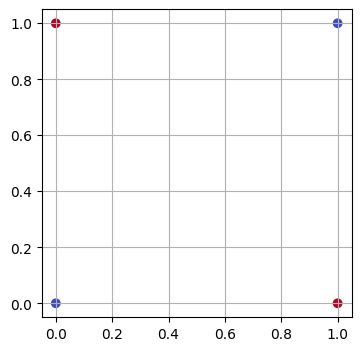

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data_xs = np.array([[0,0],[0,1],[1,0],[1,1]])
data_ys = np.array([[0,1,1,0]])

fig,ax = plt.subplots(1,1,figsize=(4.,4.))
ax.scatter(data_xs[:,0],data_xs[:,1],c = data_ys.ravel(),cmap='coolwarm')
ax.grid(True)
plt.show()

### EXERCISE1-TASK1: [20 marks]

Build a simple multilayer perceptron (MLP) from scratch using only the NumPy library to solve the XOR classification problem.

**Detailed Instructions**: Make an MLP with one hidden layer that has two neurons, each of which has a ReLU activation function. Use the sigmoid activation function for the output layer. Use cross-entropy loss as the training objective. Initialize the input weights as small, random values to introduce asymmetry, and initialize the biases to zero.

Train the network using the data in the cell blocks above: `data_xs` and `data_ys`, and train for 200 iterations. Every 20 iterations, record the training loss and examine the learned feature representations as well as the output of the model. Specifically, visualize the hidden layer activations and model output across as a heatmap over the input space ranging from -0.5 to 1.5 (for both features) to observe how the model differentiates between input regions. Use a colormap normalized between 0 and 1 for heatmaps to clearly visualize these activations.

Epoch 0
Loss: 0.24691746969516706
Predictions: [[0.60581909 0.60764606 0.61292839 0.61431799]]


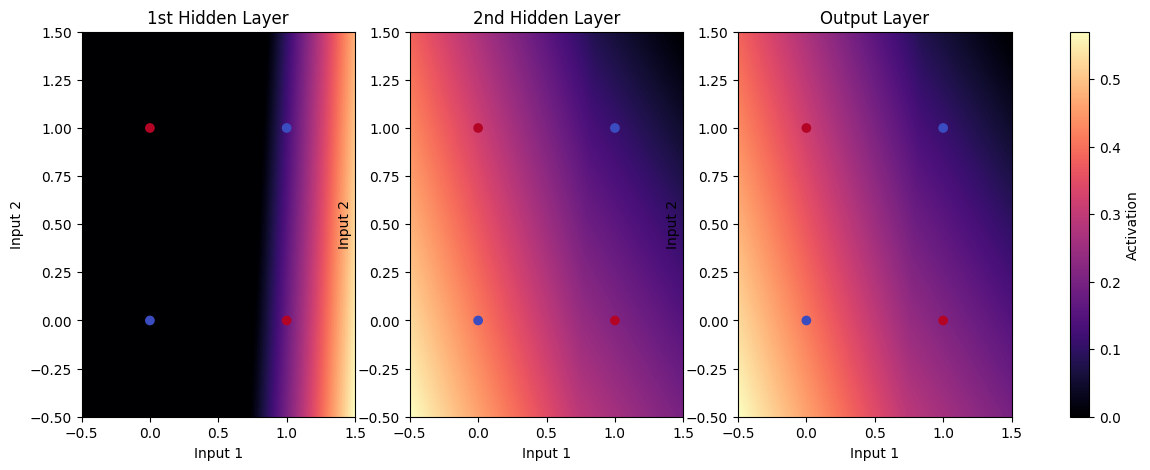

Epoch 20
Loss: 0.2629939549350849
Predictions: [[0.45642712 0.45410514 0.76908845 0.41810514]]


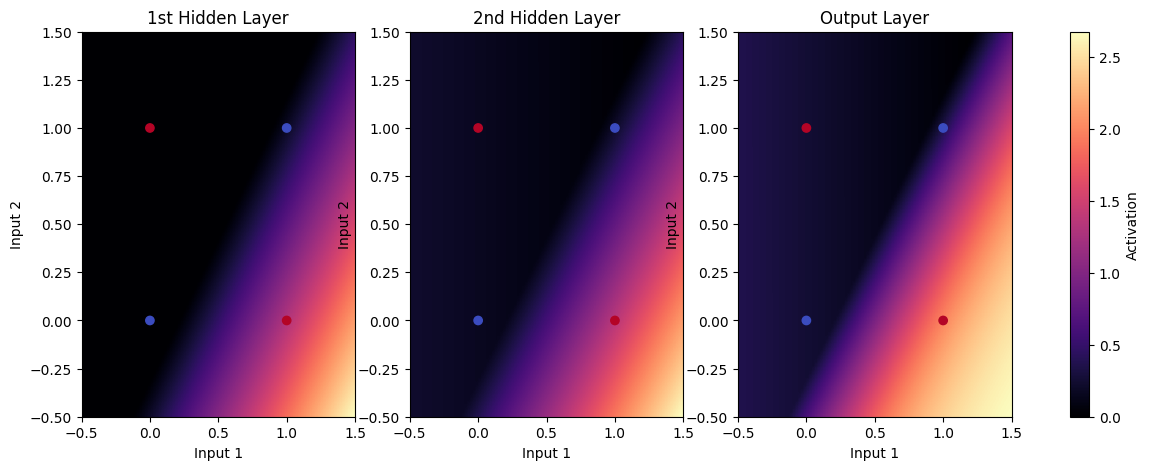

Epoch 40
Loss: 0.12284362249080029
Predictions: [[0.13904578 0.62803151 0.97413094 0.12656626]]


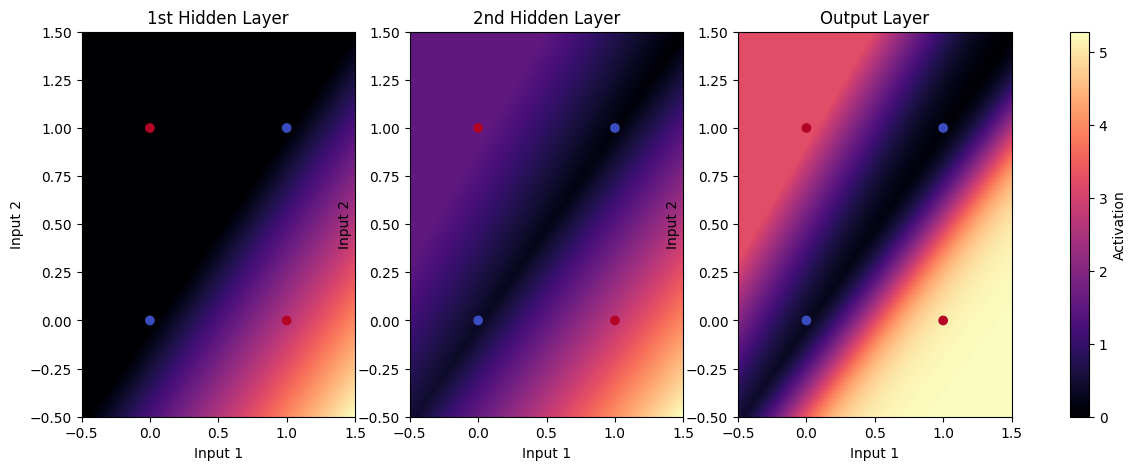

Epoch 60
Loss: 0.07833060399107653
Predictions: [[0.04440932 0.74526549 0.98087755 0.01552686]]


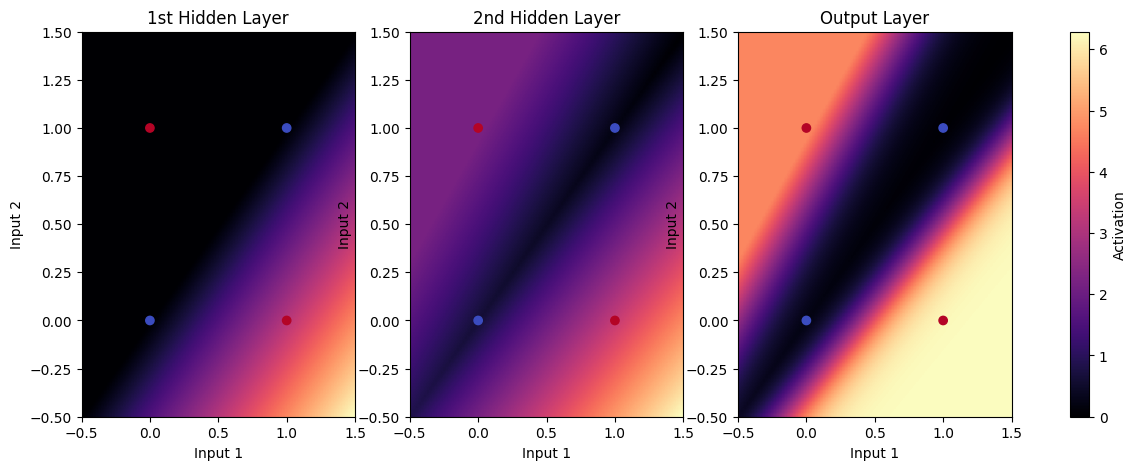

Epoch 80
Loss: 0.05178212534801034
Predictions: [[0.02655072 0.82003771 0.99131439 0.01080969]]


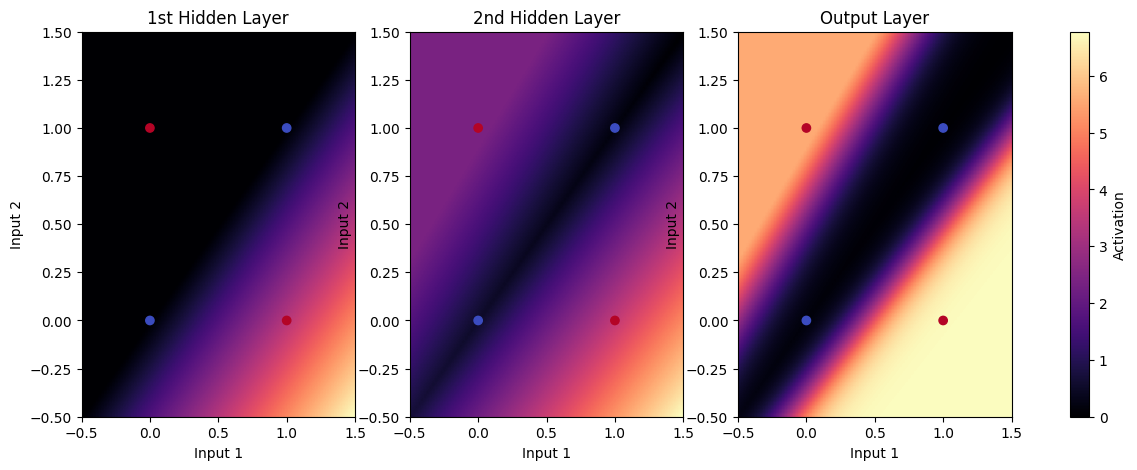

Epoch 100
Loss: 0.03791639066856027
Predictions: [[0.01649189 0.86450827 0.99394724 0.00527147]]


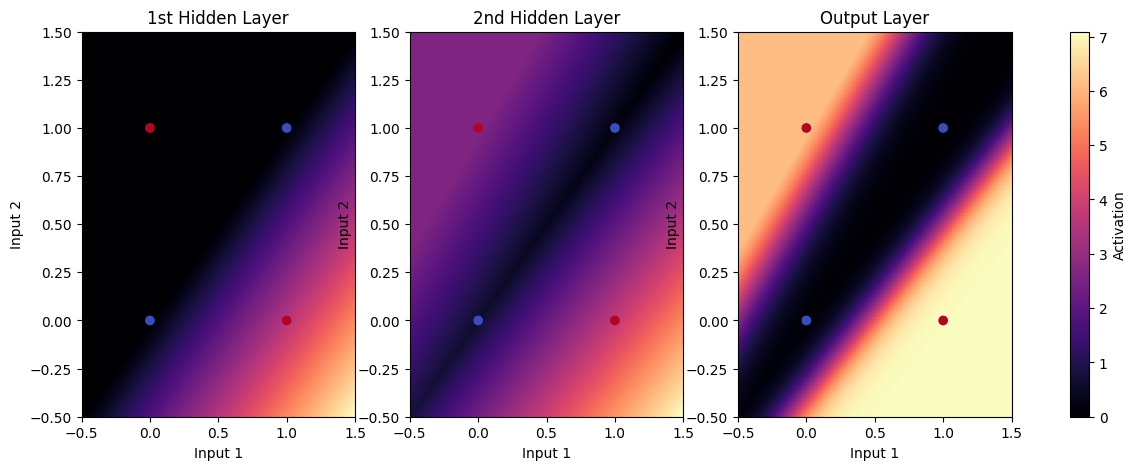

Epoch 120
Loss: 0.029431491363633346
Predictions: [[0.01176307 0.89259771 0.99590174 0.00345182]]


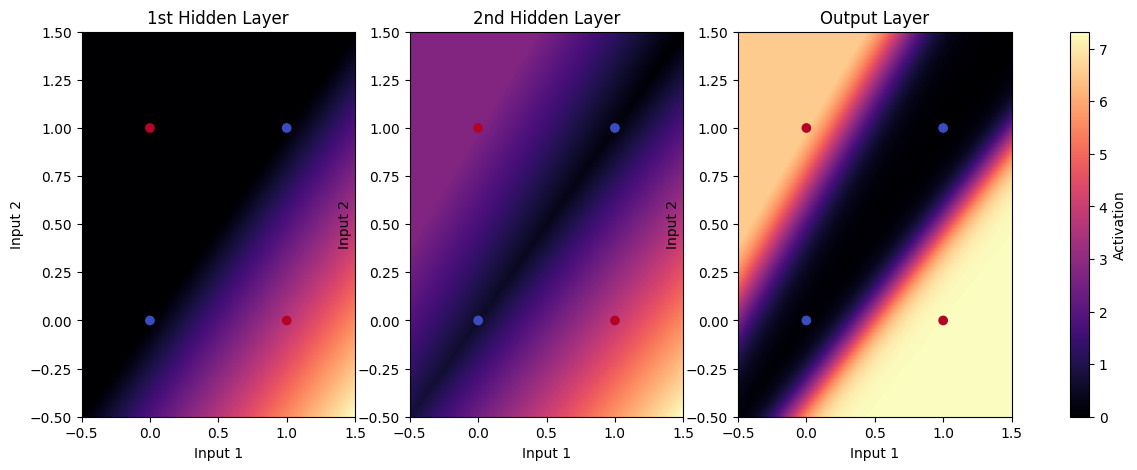

Epoch 140
Loss: 0.023779836574145268
Predictions: [[0.01067344 0.91162486 0.99741072 0.00633237]]


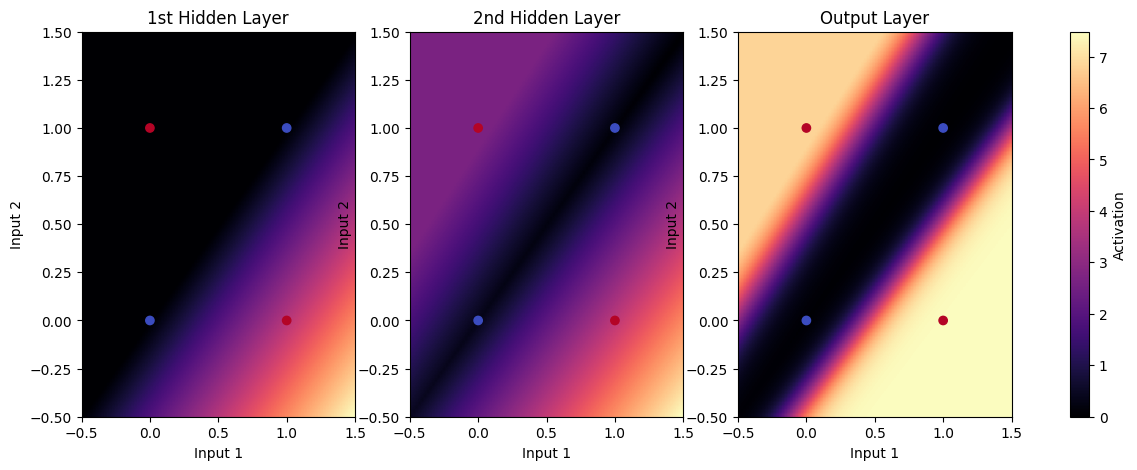

Epoch 160
Loss: 0.02009533664364304
Predictions: [[0.00820484 0.92509113 0.99748485 0.00406838]]


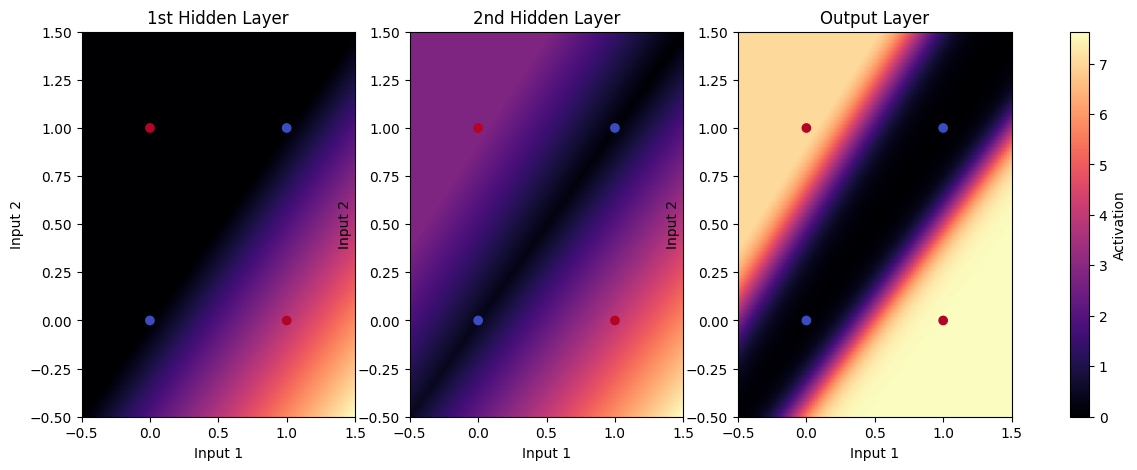

Epoch 180
Loss: 0.01727706658985529
Predictions: [[0.00670835 0.9351821  0.99790793 0.00318862]]


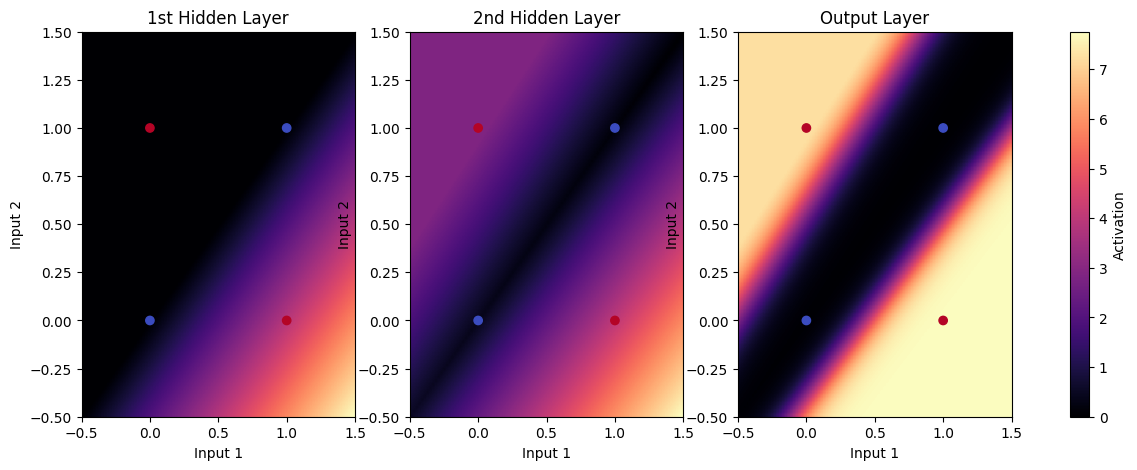

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0, 1, 1, 0]]).T

def relu_activation(x):
    # ReLU activation for the hidden layer
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid_activation(x):
    # Sigmoid activation for the output layer
    return 1 / (1 + np.exp(-x))

def compute_loss(true_values, predictions):
    return -1 / len(true_values) * np.sum(np.sum(true_values * np.log(predictions)))

input_neurons = 2
hidden_neurons = 2
output_neurons = 1

weights1 = np.random.randn(input_neurons, hidden_neurons) * 0.5
bias1 = np.random.randn(1, hidden_neurons) * 0.5
weights2 = np.random.randn(hidden_neurons, output_neurons) * 0.5
bias2 = np.random.randn(1, output_neurons) * 0.5

epochs = 200
for epoch in range(epochs):

    # Forward pass
    hidden_input = np.dot(inputs, weights1) + bias1
    hidden_output = relu_activation(hidden_input)
    final_input = np.dot(hidden_output, weights2) + bias2
    final_output = sigmoid_activation(final_input)

    # Compute loss
    loss = compute_loss(targets, final_output)

    # Backward pass
    output_error = final_output - targets
    grad_weights2 = np.dot(hidden_output.T, output_error)
    grad_bias2 = np.sum(output_error, axis=0, keepdims=True) / len(inputs)
    hidden_error = np.dot(output_error, weights2.T) * relu_derivative(hidden_input)
    grad_weights1 = np.dot(inputs.T, hidden_error)
    grad_bias1 = np.sum(hidden_error, axis=0, keepdims=True) / len(inputs)

    # Updating the parameters
    weights1 -= 0.5 * grad_weights1
    bias1 -= 0.5 * grad_bias1
    weights2 -= 0.5 * grad_weights2
    bias2 -= 0.5 * grad_bias2

    if epoch % 20 == 0:
        print(f"Epoch {epoch}")
        print(f"Loss: {loss}")
        print(f"Predictions: {final_output.T}")

        # Visualization
        x1 = np.linspace(-0.5, 1.5, 100)
        x2 = np.linspace(-0.5, 1.5, 100)
        X1, X2 = np.meshgrid(x1, x2)
        grid_points = np.c_[X1.ravel(), X2.ravel()]

        # Forward pass for the grid
        hidden_input_grid = np.dot(grid_points, weights1) + bias1
        hidden_output_grid = relu_activation(hidden_input_grid)
        final_input_grid = np.dot(hidden_output_grid, weights2) + bias2
        final_output_grid = sigmoid_activation(final_input_grid)

        # Reshape activations for heatmap
        layer1_activations = hidden_output_grid[:, 0].reshape(X1.shape)
        layer2_activations = final_input_grid[:, 0].reshape(X1.shape)
        output_activations = final_output_grid.reshape(X1.shape)

        # Plot heatmaps
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))

        heatmap = ax[0].imshow(layer1_activations, extent=[x1.min(), x1.max(), x2.min(), x2.max()], origin="lower", cmap="magma", aspect="auto")
        ax[0].scatter(inputs[:, 0], inputs[:, 1], c=targets.ravel(), cmap='coolwarm')
        ax[0].set_xlabel("Input 1")
        ax[0].set_ylabel("Input 2")
        ax[0].set_title("1st Hidden Layer")

        ax[1].imshow(layer2_activations, extent=[x1.min(), x1.max(), x2.min(), x2.max()], origin="lower", cmap="magma", aspect="auto")
        ax[1].scatter(inputs[:, 0], inputs[:, 1], c=targets.ravel(), cmap='coolwarm')
        ax[1].set_xlabel("Input 1")
        ax[1].set_ylabel("Input 2")
        ax[1].set_title("2nd Hidden Layer")

        ax[2].imshow(output_activations, extent=[x1.min(), x1.max(), x2.min(), x2.max()], origin="lower", cmap="magma", aspect="auto")
        ax[2].scatter(inputs[:, 0], inputs[:, 1], c=targets.ravel(), cmap='coolwarm')
        ax[2].set_xlabel("Input 1")
        ax[2].set_ylabel("Input 2")
        ax[2].set_title("Output Layer")

        colorbar = fig.colorbar(heatmap, ax=ax)
        colorbar.set_label("Activation")
        plt.show()

## Exercise 2. Convolutional Neural Networks

### EXERCISE2-TASK1: [10 marks]
Explore feature extraction in image processing by implementing a set of convolutional filters using PyTorch, by implementing convolution kernels and applying them to an image dataset.

**Detailed instructions:** Reproduce the horizontal and vertical edge detectors encountered in class, as well as two diagonal edge detectors, a blurring kernel, and a pass-through (identity) kernel that leaves the image unaltered. Start by using PyTorch to define your tensors, and then write a function, `corr2d`, from scratch to perform the 2D convolution operations. This function should take in an input matrix and a kernel, and output the resulting convolved matrix. To ensure seamless edge detection across the image boundaries, use padding of 2 pixels around each input image. The `corr2d` function should pre-allocate a tensor to store the resulting feature maps from each convolution operation.

For this exercise, use the `load_digits` dataset from the `sklearn.datasets` module, which provides a set of 8x8 grayscale images of handwritten digits. This dataset is commonly used for classification tasks and serves as an excellent basis for applying image filters, as each image contains clear structural features that are easily highlighted by edge detection and blurring kernels.

Finally, apply each of the six kernels to 5 images in this dataset from 5 different classes and visualize the resulting feature maps to observe how each kernel emphasizes different visual elements. Be sure to label the type of convolution applied in each of your plots.

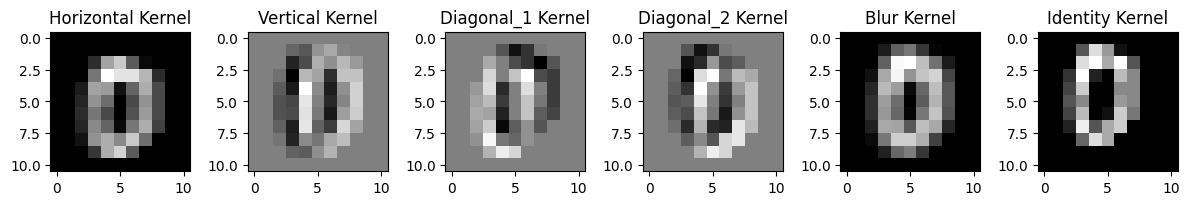

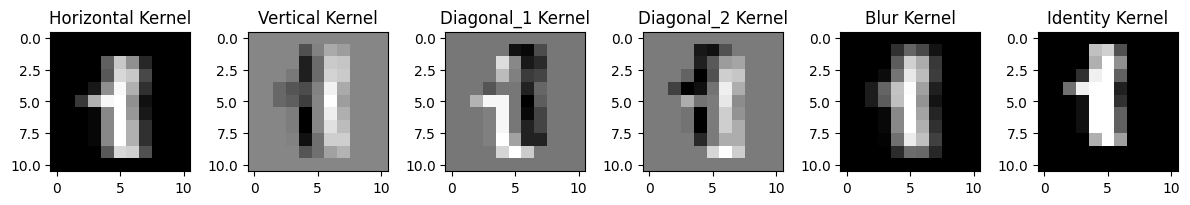

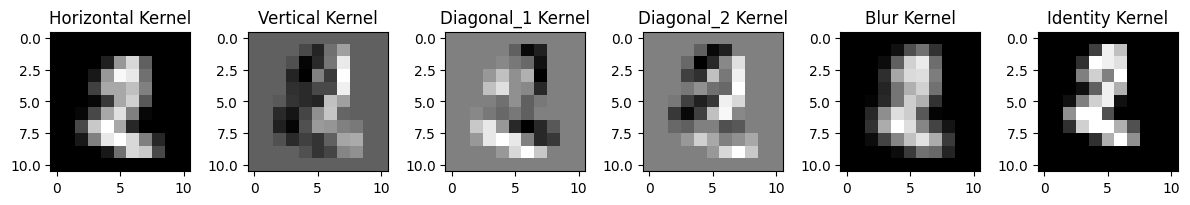

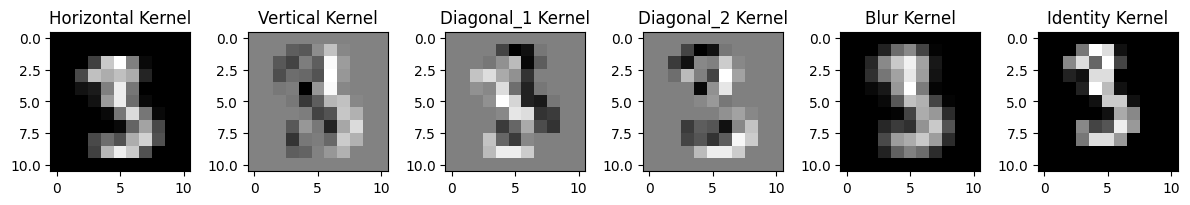

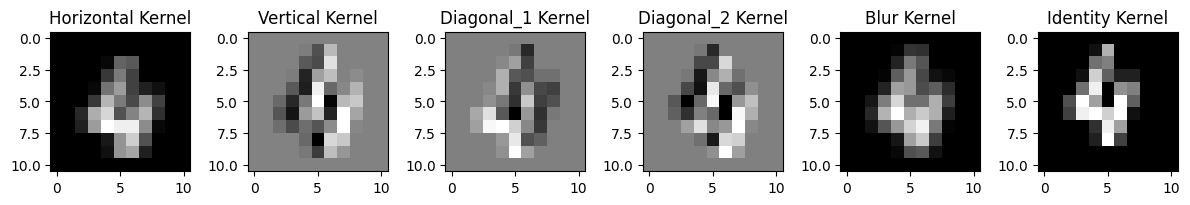

In [ ]:
### SOLUTION BLOCK ###
### YOUR CODE GOES HERE ###

from sklearn.datasets import load_digits
import torch
import matplotlib.pyplot as plt

digits = load_digits()

images = digits.images # Shape: (1797, 8, 8)
#print(images[1].shape) # Shape: (8,8)

kernels = {
    #Filters: Horizontal, vertical, two diagonal edge, blurring kernel, and a pass-through (identity)
    "Horizontal" : torch.tensor([[1, 1], [0, 0]]),
    "Vertical" : torch.tensor([[1, -1], [1, -1]]),
    "diag_1":  torch.tensor([[0, 1], [-1, 0]]),
    "diag_2": torch.tensor([[1, 0], [0, -1]]),
    "blur": torch.tensor([[1, 1], [1, 1]]) / 9.0,
    "identity": torch.tensor([[0, 0], [0, 1]])
}

def corr2d(X, kernel):

  # Creating a tensor of the image data and the kernel with the copy of the inputs.
  X = torch.tensor(X)

  # Adding pad as given in the question (2).
  # Adding 2 layers of zeros around the input matrix.
  X = torch.nn.functional.pad(X, (2, 2, 2, 2), "constant", 0) # (12,12)

  # Creating an empty tensor to store the result of the convolution operation.
  # Shape of convolued matrix = [input - filter + 1, input - filter + 1]
  convoluted_matrix = torch.zeros(
      # 12 - 2 + 1 = 11
      (X.shape[0] - kernel.shape[0] + 1,
      # 12 - 2 + 1 = 11
       X.shape[1] - kernel.shape[1] + 1)
  )
  # Shape of the Convoluted matrix: (10, 10)

  for i in range(convoluted_matrix.shape[0]):
    for j in range(convoluted_matrix.shape[1]):
      convoluted_matrix[i, j] = (X[i:i + kernel.shape[0], j:j + kernel.shape[1]] * kernel).sum()

  return convoluted_matrix

# Applying CNN to the images
for index, image in enumerate(images[:5]):
  horizontal_convoluted_matrix = corr2d(image, kernels["Horizontal"])
  vertical_convoluted_matrix = corr2d(image, kernels["Vertical"])
  diag_1_convoluted_matrix = corr2d(image, kernels["diag_1"])
  diag_2_convoluted_matrix = corr2d(image, kernels["diag_2"])
  blur_convoluted_matrix = corr2d(image, kernels["blur"])
  identity_convoluted_matrix = corr2d(image, kernels["identity"])

  # Generating feature maps from 5 different classes
  kernel_names = ['Horizontal', 'Vertical', 'Diagonal_1', 'Diagonal_2', 'Blur', 'Identity']

  plt.figure(figsize=(12, 5))
  for j, image in enumerate([horizontal_convoluted_matrix,
                             vertical_convoluted_matrix,
                             diag_1_convoluted_matrix,
                             diag_2_convoluted_matrix,
                             blur_convoluted_matrix,
                             identity_convoluted_matrix]):
    plt.subplot(1, 6, j + 1)
    plt.imshow(image,  cmap='gray')
    plt.title(f"{kernel_names[j]} Kernel")
    plt.tight_layout()
plt.show()

### EXERCISE2-TASK2: [10 marks]

Apply pooling operations to feature maps generated using the convolution kernels you defined in EXERCISE2-TASK1, to explore how pooling impacts spatial resolution.

**Detailed instructions:** Write a function, `pool2d` that performs pooling on a given feature map. This function should support both max-pooling and average-pooling modes and take in the window size for pooling as an argument.
Next, apply your `pool2d` function to each of the feature maps generated in EXERCISE2-TASK1. Visualize the pooled feature maps to understand how much detail is retained.

Pooling is typically used to lower the resolution in a convolutional neural network, to balance the increase in feature map channels after convolution. Print out the dimensionality of an original training example, and the dimensionality after the pooling step.

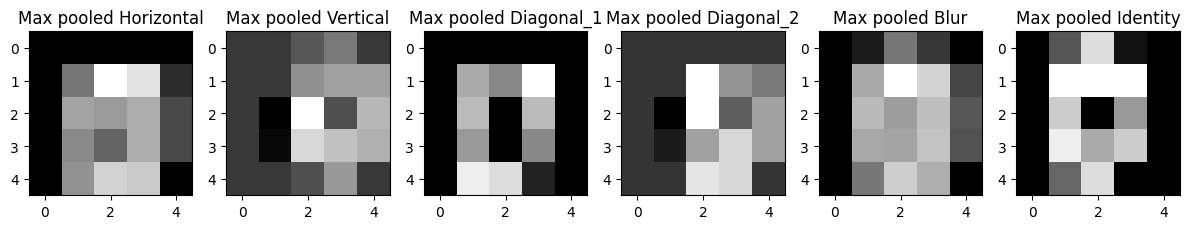

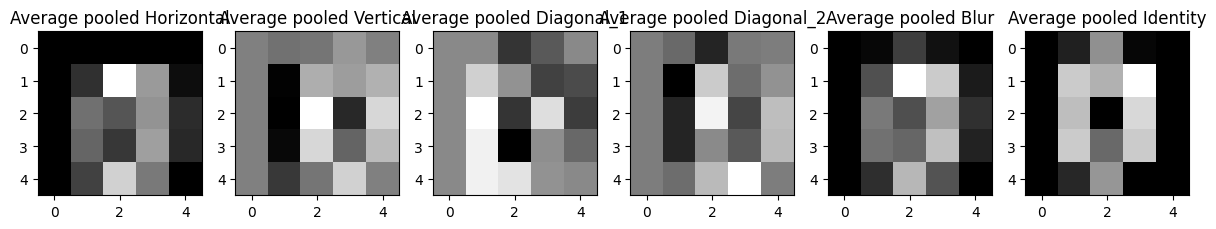

Shape of the Original matrix (8, 8)
Shape before pooling: torch.Size([11, 11])
Shape of the pooled matrix torch.Size([5, 5])


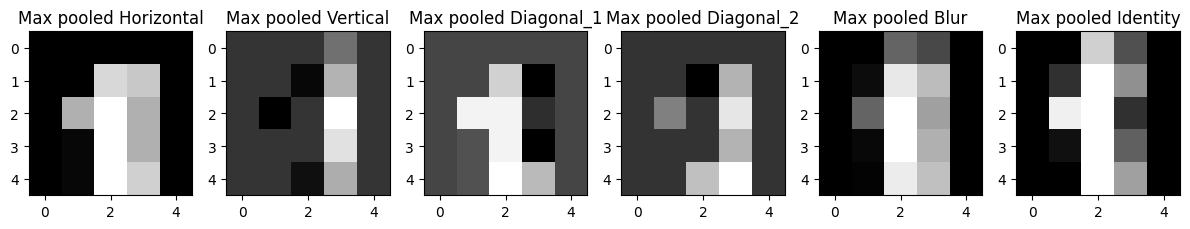

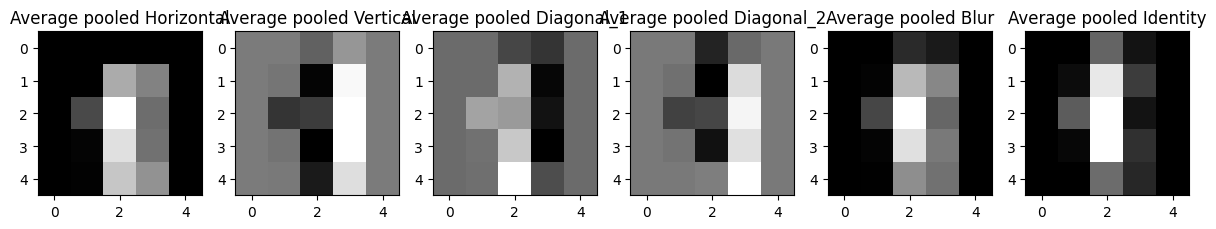

Shape of the Original matrix (8, 8)
Shape before pooling: torch.Size([11, 11])
Shape of the pooled matrix torch.Size([5, 5])


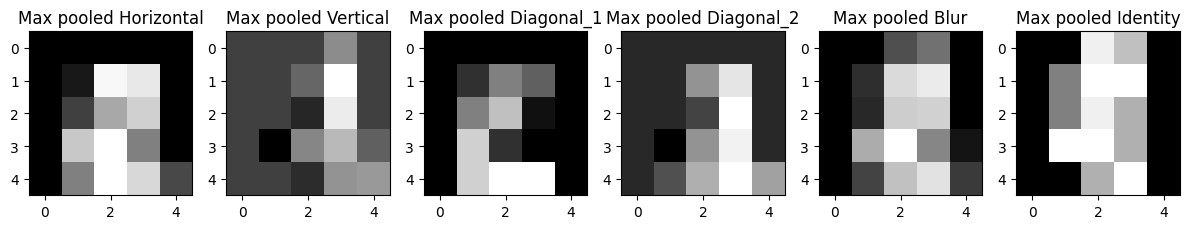

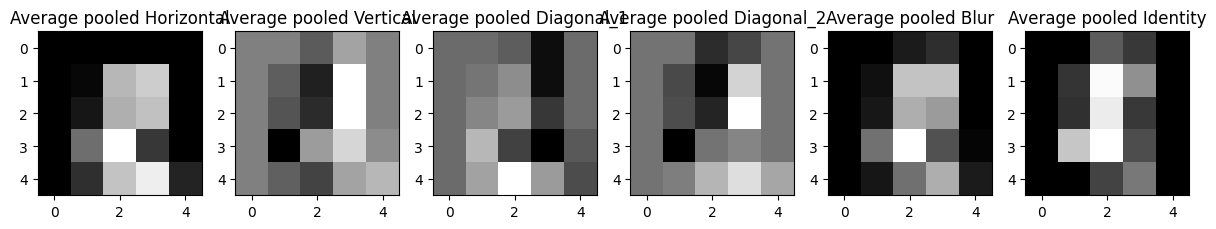

Shape of the Original matrix (8, 8)
Shape before pooling: torch.Size([11, 11])
Shape of the pooled matrix torch.Size([5, 5])


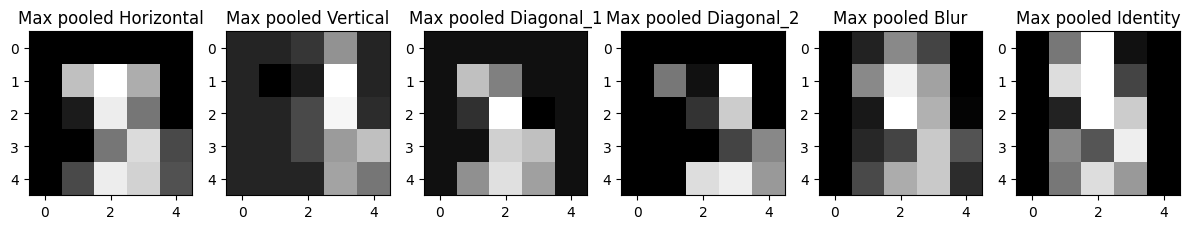

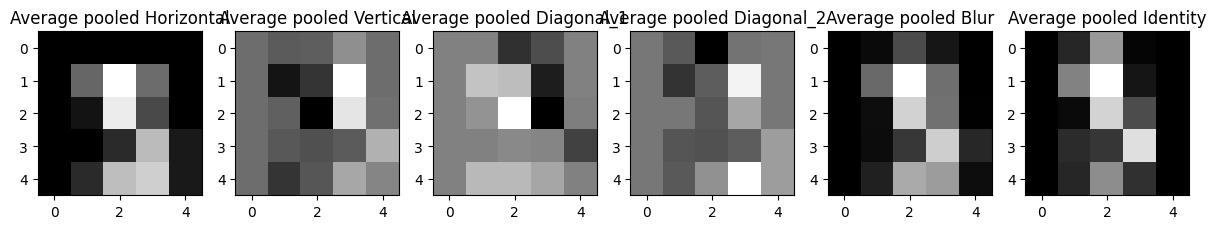

Shape of the Original matrix (8, 8)
Shape before pooling: torch.Size([11, 11])
Shape of the pooled matrix torch.Size([5, 5])


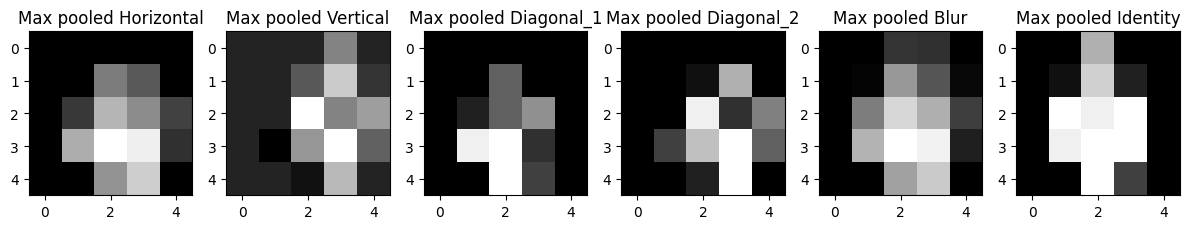

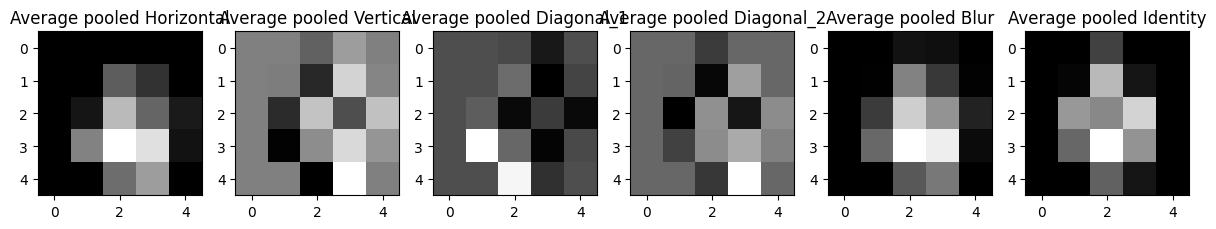

Shape of the Original matrix (8, 8)
Shape before pooling: torch.Size([11, 11])
Shape of the pooled matrix torch.Size([5, 5])


In [ ]:
### SOLUTION BLOCK ###
### YOUR CODE GOES HERE ###

# Stride of 2 and a window size of 2x2

def pool2d(X, technique, window_size = 2, stride = 2):
  """
  X : Convoluted matrix
  technique : Max or average
  window_size : Size of the window

  Returns: Pooled matrix
  """
  h,w = X.shape
  output_height = int(((h - window_size) / stride) + 1)
  output_width = int(((w - window_size) / stride) + 1)

  pooled_matrix = torch.zeros((output_height, output_width))

  for i in range(output_height):
    for j in range(output_width):
        pooling_region = X[i * window_size : (i+1) * window_size, j * window_size : (j+1) * window_size]

        if technique == 'max':
          pooled_matrix[i, j] = torch.max(pooling_region)
        elif technique == 'avg':
          pooled_matrix[i, j] = torch.mean(pooling_region)

  return pooled_matrix

for index, image in enumerate(images[:5]):
  horizontal_convoluted_matrix = corr2d(image, kernels["Horizontal"])
  vertical_convoluted_matrix = corr2d(image, kernels["Vertical"])
  diag_1_convoluted_matrix = corr2d(image, kernels["diag_1"])
  diag_2_convoluted_matrix = corr2d(image, kernels["diag_2"])
  blur_convoluted_matrix = corr2d(image, kernels["blur"])
  identity_convoluted_matrix = corr2d(image, kernels["identity"])

  shape_before_pooling = horizontal_convoluted_matrix.shape

  kernel_names = ['Horizontal', 'Vertical', 'Diagonal_1', 'Diagonal_2', 'Blur', 'Identity']

  plt.figure(figsize=(12, 5))
  window_size = 2
  stride = 2

  # Performing Pooling using max pooling
  pooled_images = ([pool2d(horizontal_convoluted_matrix, technique="max"),
                    pool2d(vertical_convoluted_matrix, technique="max"),
                    pool2d(diag_1_convoluted_matrix, technique="max"),
                    pool2d(diag_2_convoluted_matrix, technique="max"),
                    pool2d(blur_convoluted_matrix, technique="max"),
                    pool2d(identity_convoluted_matrix, technique="max")])
  for j, image in enumerate(pooled_images):
    plt.subplot(1, 6, j + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Max pooled {kernel_names[j]}")
    plt.tight_layout()
  plt.show()

  plt.figure(figsize=(12, 5))

  # Performing Pooling using max pooling
  avg_pooled_images = ([pool2d(horizontal_convoluted_matrix, technique="avg"),
                    pool2d(vertical_convoluted_matrix, technique="avg"),
                    pool2d(diag_1_convoluted_matrix, technique="avg"),
                    pool2d(diag_2_convoluted_matrix, technique="avg"),
                    pool2d(blur_convoluted_matrix, technique="avg"),
                    pool2d(identity_convoluted_matrix, technique="avg")])
  for j, image in enumerate(avg_pooled_images):
    plt.subplot(1, 6, j + 1)
    plt.imshow(image,  cmap='gray')
    plt.title(f"Average pooled {kernel_names[j]}")
    plt.tight_layout()
  plt.show()

  print("Shape of the Original matrix", images[0].shape)
  print("Shape before pooling:", shape_before_pooling)
  print("Shape of the pooled matrix", pooled_images[0].shape)

### EXERCISE2-TASK3: [10 marks]
Build a Convolutional Neural Network using the PyTorch library.

**Detailed instructions:**
Implement a CNN with an initial convolutional layer with 8 filters of size 3x3, padding set to 1, followed by a `ReLU` activation function.
A second convolutional layer with 3 filters of size 3x3, again with padding 1 and followed by `ReLU` activation function.
A max pooling layer with a 2x2 kernel to downsample the features.
A fully connected layer with 120 units, followed by another fully connected layer with 84 units.
Finally, the output layer should have 10 units for classification (one for each digit from 0 to 9).

In the next cell block, include an image of a hand-drawn sketch of the architecture specified.
In the cell block after that, implement the CNN using the PyTorch library.

In [ ]:
### SOLUTION BLOCK ###
### LINK A HAND-DRAWN SKETCH OF YOUR CNN ARCHITECTURE HERE ###

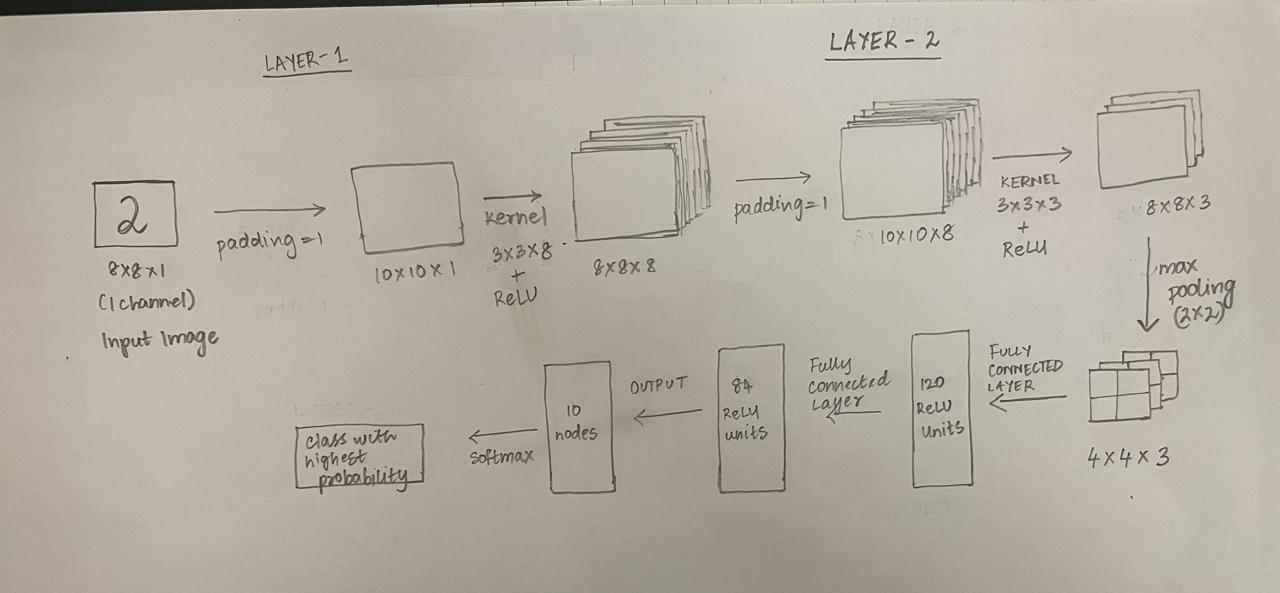

In [ ]:
### SOLUTION BLOCK ###
### YOUR CODE GOES HERE ###

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
  def __init__(self):
     # Gives access to the methods and properties of nn.Module
    super(CNN, self).__init__()

    # Initialising layer 1 with 8 filters, 3x3 filter, padding of 1 and a stride of 1
    self.Con_layer_1 = nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = 3, stride=1, padding= 1)

    # Initialising layer 2 with 3 filters, 3x3 filter, padding of 1 and a stride of 1
    self.Con_layer_2 = nn.Conv2d(in_channels = 8, out_channels = 3, kernel_size = 3, stride=1, padding= 1)

    # Performing Max pooling
    self.max_pool = torch.nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0)

    # Fully connected layers
    # Applies an affine linear transformation to the incoming data
    self.fc1 = nn.Linear(in_features = 3 * 4 * 4, out_features = 120)
    self.fc2 = nn.Linear(in_features = 120, out_features = 84)
    self.fc3 = nn.Linear(in_features = 84, out_features = 10) # Output layer

  def forward(self, x):
    # Applying reLU to Layer 1
    x = F.relu(self.Con_layer_1(x))
    # Applying reLU to Layer 2
    x = F.relu(self.Con_layer_2(x))
    # Applyign max pooling
    x = self.max_pool(x)

    """
    After passing through 2 layer of convolutions, the shape of the input:
    3 (channels) * 4 (height) * 4 (width)
    """
    # Flattening the feature map
    x = x.view(-1, 3 * 4 * 4)

    # Applying relu activation for the fully connected layers
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))

    # Applying softmax to find the probabilities on the output layer
    x = self.fc3(x)

    return x

conv_net = CNN()

### EXERCISE2-TASK4: [10 marks]
Train the CNN on the `load_digits` dataset from `sklearn` using stochastic gradient descent, while monitoring both training loss and validation loss.

**Detailed Instructions** Start by preprocessing the load_digits dataset by normalizing the pixel values to fall between 0 and 1. Partition the data into 40% training, 40% validation, and 20% testing using repeated applications of `sklearn.model_selection.train_test_split`.

Use stochastic gradient descent (SGD) as the optimizer with a learning rate of 0.001 and momentum of 0.9.
Train this CNN for a minimum of 1000 epochs with a batch size of 16.
Every epoch, record both the training and validation loss. Employ check-pointing to save a copy of the model when validation loss improves. We recommend using a progress bar from the `tqdm` library to monitor training progress, as this part can take several minutes.

After training, plot both the training loss over time and the validation loss.
Evaluate the best model's performance on the retained test dataset and report the final accuracy.

Epoch 1000/1000: 100%|██████████| 45/45 [00:00<00:00, 339.25it/s]


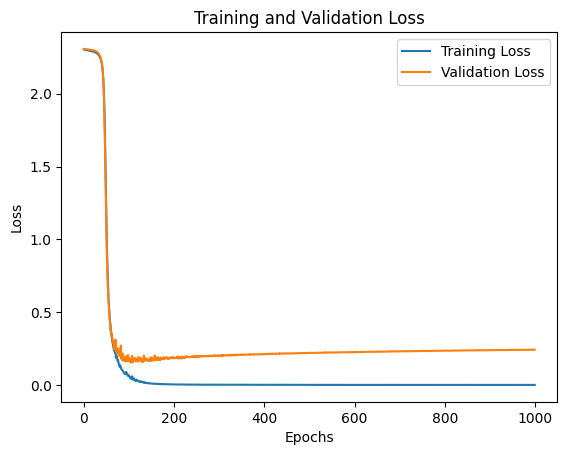

Accuracy of the model on the test set: 93.89%


<ipython-input-10-d1117c08c96b>:115: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  conv_net.load_state_dict(torch.load('parameters.pth'))


In [ ]:
### SOLUTION BLOCK ###
### YOUR CODE GOES HERE ###
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt

# Load and preprocessing the data so values are between 0 and 1
digits = load_digits()

# Flattened data matrix
a = digits.data # Shape: (1797, 64)

# Input images
X = digits.images # Shape: (1797, 8, 8)
#print(X[0])

# Classification target
y = digits.target # Shape: (1797,)

# Normalising the values - The feature values are between 0 to 16.
X = X / 16.0

# We have to reshape the data, X since Conv2d expects the input to be of the form (batch_size, channels, height, width)
x = X[:, np.newaxis, :, :] # Shape: (1797, 1, 8, 8)

# Partitioning the data - Training(40%), Validation(40%) and Test(20%)

# 60 % of the dataset is reserved for validation and testing while 40 % is assigned to X_train and y_train
X_train, X_res, y_train, y_res = train_test_split(x, y, test_size = 0.6, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_res, y_res, test_size = 0.333, random_state = 42)

#Converting the dataset into tensors
X_train, y_train = torch.tensor(X_train, dtype = torch.float32), torch.tensor(y_train, dtype = torch.long)
X_val, y_val = torch.tensor(X_val, dtype = torch.float32), torch.tensor(y_val, dtype = torch.long)
X_test, y_test = torch.tensor(X_test, dtype = torch.float32), torch.tensor(y_test, dtype = torch.long)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size = 16, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 16, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size = 16, shuffle = False)

conv_net = CNN()
# Using stochastic gradient descent (SGD) as the optimizer with a learning rate of 0.001 and momentum of 0.9
optimizer = optim.SGD(conv_net.parameters(), lr = 0.001, momentum = 0.9)
criterion = nn.CrossEntropyLoss()

# Training for 1000 epochs
num_epochs = 1000

# Lists to store the training and validation losses
train_losses = []
val_losses = []

best_val_loss = float('inf')

for epoch in range(num_epochs):
    conv_net.train()
    #  Every epoch, record both the training and validation loss.
    train_loss = 0.0
    for inputs, labels in tqdm(train_loader, desc = f"Epoch {epoch + 1}/{num_epochs}"):
        optimizer.zero_grad()
        # Generating the output for each input in train_loader
        output = conv_net(inputs)
        # Computing the loss between predictions and labels
        loss = criterion(output, labels)
        # Backward pass to update the parameters based on the loss
        loss.backward()
        optimizer.step()

        # Adding the loss for the current batch to the train_loss
        train_loss += loss.item() # item() extracts the loss as a float value

    # Calculating the training loss for each epoch
    average_train_loss = train_loss / len(train_loader)
    train_losses.append(average_train_loss)

    # Validation phase
    # Setting the model to evaluation mode
    conv_net.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            output = conv_net(inputs)
            loss = criterion(output, labels)
            val_loss += loss.item()

    average_val_loss = val_loss / len(val_loader)
    val_losses.append(average_val_loss)

    # Checkpoint
    # Checking if the current validation loss is the least of all losses
    if average_val_loss < best_val_loss:
        best_val_loss = average_val_loss
        # Saves the model parameters
        torch.save(conv_net.state_dict(), 'parameters.pth')

# Plotting the graph
plt.plot(train_losses, label = 'Training Loss')
plt.plot(val_losses, label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Load the best model and evaluate on the test set
conv_net.load_state_dict(torch.load('parameters.pth'))
conv_net.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = conv_net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test set: {accuracy:.2f}%')

### EXERCISE2-TASK5: [10 marks]

Compare the classification performance of your Convolutional Neural Network (CNN) to a traditional Support Vector Classifier (SVC) on the `load_digits` dataset from `sklearn`.

**Detailed Instructions**: Use the same train/validation/test split as used to train the CNN. Treat the pixels as independent features (i.e. flatten the input arrays). Use `sklearn.svm.SVC` and set `gamma=0.001` to control the influence of each training sample. Use the default settings for other parameters, and train on the flattened version of the images.
Write a few sentences to reflect on which model performed better and why, and how you might improve on the worse-performing model.

In [ ]:
### SOLUTION BLOCK ###
### YOUR CODE GOES HERE ###
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


digits = load_digits()
X = digits.images
y = digits.target

X = X[:, np.newaxis, :, :]

# Splittin the dataset into Training and temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
# Splitting the dataset into Testing and validation set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Converting the dataset into tensors
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)
X_val, y_val = torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long)

# Flatten the input arrays for SVC (treat pixels as independent features)
X_train_flat = X_train.view(X_train.size(0), -1).numpy()
X_val_flat = X_val.view(X_val.size(0), -1).numpy()
X_test_flat = X_test.view(X_test.size(0), -1).numpy()

# Convert targets to numpy
y_train = y_train.numpy()
y_val = y_val.numpy()
y_test = y_test.numpy()

# Implement Support vector machine
svc = SVC(gamma=0.001)
svc.fit(X_train_flat, y_train)

# Evaluate on the validation set
validation_set = svc.predict(X_val_flat)
validation_accuracy = accuracy_score(y_val, validation_set)
print(f"SVM validation accuracy: {validation_accuracy * 100:.2f}%")

# Evaluate on the test set
y_pred = svc.predict(X_test_flat)
flat_accuracy = accuracy_score(y_test, y_pred)
print(f"SVM test accuracy: {flat_accuracy * 100:.2f}%")

SVM validation accuracy: 98.52%
SVM test accuracy: 97.04%


The SVM model is performing better compared to the CNN model.

## Exercise 3. Recurrent Neural Networks

The code in the block below was minimally adapted from an implementation of a character-level RNN developed by Andrej Karpathy, and referenced in his excellent blog post "The unreasonable effectiveness of RNNs": http://karpathy.github.io/2015/05/21/rnn-effectiveness/

In [ ]:
"""
Minimal character-level Vanilla RNN model. Written by Andrej Karpathy (@karpathy)
BSD License
"""
import numpy as np

def lossFun(inputs, targets, hprev):
    """
    inputs,targets are both list of integers.
    hprev is Hx1 array of initial hidden state
    returns the loss, gradients on model parameters, and last hidden state
    """
    xs, hs, ys, ps = {}, {}, {}, {}
    hs[-1] = np.copy(hprev)
    loss = 0
    # forward pass
    for t in range(len(inputs)):
        xs[t] = np.zeros((vocab_size,1)) # encode in 1-of-k representation
        xs[t][inputs[t]] = 1
        hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh) # hidden state
        ys[t] = np.dot(Why, hs[t]) + by # unnormalized log probabilities for next chars
        ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars

        loss += -np.log(ps[t][targets[t],0]) # softmax (cross-entropy loss)

    # backward pass: compute gradients going backwards
    dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
    dbh, dby = np.zeros_like(bh), np.zeros_like(by)
    dhnext = np.zeros_like(hs[0])
    for t in reversed(range(len(inputs))):
        dy = np.copy(ps[t])
        dy[targets[t]] -= 1 # backprop into y. see http://cs231n.github.io/neural-networks-case-study/#grad if confused here
        dWhy += np.dot(dy, hs[t].T)
        dby += dy
        dh = np.dot(Why.T, dy) + dhnext # backprop into h
        dhraw = (1 - hs[t] * hs[t]) * dh # backprop through tanh nonlinearity
        dbh += dhraw
        dWxh += np.dot(dhraw, xs[t].T)
        dWhh += np.dot(dhraw, hs[t-1].T)
        dhnext = np.dot(Whh.T, dhraw)
    for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
        np.clip(dparam, -5, 5, out=dparam) # clip to mitigate exploding gradients
    return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs)-1]

def sample(h, seed_ix, n):
    """
    sample a sequence of integers from the model
    h is memory state, seed_ix is seed letter for first time step
    """
    x = np.zeros((vocab_size, 1))
    x[seed_ix] = 1
    ixes = []

    ps = []
    for t in range(n):
        h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
        y = np.dot(Why, h) + by
        p = np.exp(y) / np.sum(np.exp(y))
        ix = np.random.choice(range(vocab_size), p=p.ravel())
        x = np.zeros((vocab_size, 1))
        x[ix] = 1
        ixes.append(ix)
    return ixes, ps

data = 'the quick brown fox jumped over the lazy dog.'
print('Training Data: \n', data)

chars = sorted(list(set(data)))
data_size, vocab_size = len(data), len(chars)
print('data has %d characters, %d unique.' % (data_size, vocab_size))
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

# hyperparameters
hidden_size = 100 # size of hidden layer of neurons
sample_length = data_size-1
seq_length =  sample_length # number of steps to unroll the RNN for
learning_rate = 1e-1

# model parameters
Wxh = np.random.randn(hidden_size, vocab_size)*0.01 # input to hidden
Whh = np.random.randn(hidden_size, hidden_size)*0.01 # hidden to hidden
Why = np.random.randn(vocab_size, hidden_size)*0.01 # hidden to output
bh = np.zeros((hidden_size, 1)) # hidden bias
by = np.zeros((vocab_size, 1)) # output bias

n, p = 0, 0
mWxh, mWhh, mWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
mbh, mby = np.zeros_like(bh), np.zeros_like(by) # memory variables for Adagrad
smooth_loss = -np.log(1.0/vocab_size)*seq_length # loss at iteration 0

max_iters = 500
while n < max_iters:
    # prepare inputs (we're sweeping from left to right in steps seq_length long)
    if p+seq_length+1 >= len(data) or n == 0:
        hprev = np.zeros((hidden_size,1)) # reset RNN memory
        p = 0 # go from start of data
    inputs = [char_to_ix[ch] for ch in data[p:p+seq_length]]
    targets = [char_to_ix[ch] for ch in data[p+1:p+seq_length+1]]

    # sample from the model now and then
    if n % 5 == 0:
        # print('input character: ', ix_to_char[inputs[0]])
        sample_ix, ps = sample(hprev, inputs[0], sample_length)
        txt = ''.join(ix_to_char[ix] for ix in sample_ix)
        print('Iteration %d (loss: %f) Output: \n ----\n %s \n----' % (n, smooth_loss, txt))

    # forward seq_length characters through the net and fetch gradient
    loss, dWxh, dWhh, dWhy, dbh, dby, hprev = lossFun(inputs, targets, hprev)
    smooth_loss = smooth_loss * 0.999 + loss * 0.001
    if n % 100 == 0:
        print('iter %d, loss: %f' % (n, smooth_loss)) # print progress

    # perform parameter update with Adagrad
    for param, dparam, mem in zip([Wxh, Whh, Why, bh, by],
                                [dWxh, dWhh, dWhy, dbh, dby],
                                [mWxh, mWhh, mWhy, mbh, mby]):
        mem += dparam * dparam
        param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update

    p += seq_length # move data pointer
    n += 1 # iteration counter

Training Data: 
 the quick brown fox jumped over the lazy dog.
data has 45 characters, 27 unique.
Iteration 0 (loss: 145.016822) Output: 
 ----
 hmezcwzdtvmd.chtfoubneekxjgmvhuwjzhcclhuizfy 
----
iter 0, loss: 145.016812
Iteration 5 (loss: 145.291888) Output: 
 ----
 he  kcfplyfylcqykceckcoyqyeylceykyfcecfuickc 
----
Iteration 10 (loss: 145.788139) Output: 
 ----
 he qqtvkxkfrydxclc.uxoiemhxoxoxotaxotovonwto 
----
Iteration 15 (loss: 145.798318) Output: 
 ----
 ee mi.uqofdkhtdbwzvjdfyzouyf kibyfhzdjdedrdb 
----
Iteration 20 (loss: 145.757474) Output: 
 ----
 he quicx egl f t krjdj j.p l ldmwm kcl ndk j 
----
Iteration 25 (loss: 145.563973) Output: 
 ----
 he quiykrmrorxrfrkqvr d.o. q mhnrlfzr.rvpoac 
----
Iteration 30 (loss: 145.347559) Output: 
 ----
 he quich vu.utumpvqeutele pnuiovumav totgbrx 
----
Iteration 35 (loss: 145.158504) Output: 
 ----
 he quicxyfuka  xyowzdfwodoaf fhxpk opohxqxgy 
----
Iteration 40 (loss: 144.867565) Output: 
 ----
 he quictd ptaedzojdtpluehzo hfgmovdn.mp

### EXERCISE3-TASK1: [10 marks]

Modify the code to inspect the conditioned probability distributions over candidate characters, at each point in the sequence, and how those distributions evolve over training.

**Detailed instructions:** Every 20th pass over the training data, generate a heatmap to visualize the conditioned distributions at each character position. The actual sequence characters (e.g., `t`, `h`, `e`,` `, `l`, `a`, `z`, `y`, ...) should be the column labels of the heatmap, representing the positions within the input sequence. The rows should represent all possible candidate characters (e.g.,` `,`.`, `a`, `b`, `c`, ...) from the dataset vocabulary.

To do this, modify the RNN code to capture the probabilities of each candidate character (i.e., `ps` dictionary in the forward pass) for each position in the input sequence. Each cell in the heatmap will represent the probability of a particular candidate character (row) occurring at a specific position in the sequence (column). Overlay a scatterplot on each heatmap generated to show the correct character among the candidates (in matplotlib, this can be done by setting `facecolor='none'` to ensure that the colors of the underlying heatmap are not obscured by the scatter points).

Iteration 0 (loss: 145.0168) Output: \n----\nvnqwoftirim iaypl.jnfmnk or.oehgzxkncmuyieeg\n----


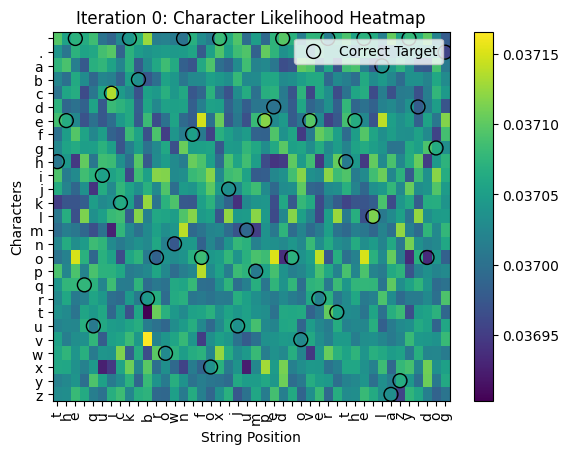

Iteration 5 (loss: 145.2968) Output: \n----\nxi   b  b      .o                           \n----
Iteration 10 (loss: 145.5199) Output: \n----\nke vuvwznxazatuiaxbr.gatakyvdgag.vavamaj.i.t\n----
Iteration 15 (loss: 145.5884) Output: \n----\nhe nue khk wclaeul kgj k fdbgkobilur k kakjv\n----
Iteration 20 (loss: 145.5393) Output: \n----\nheoquj johum eetrhu. b b zyjazuhrj zyl buhuz\n----


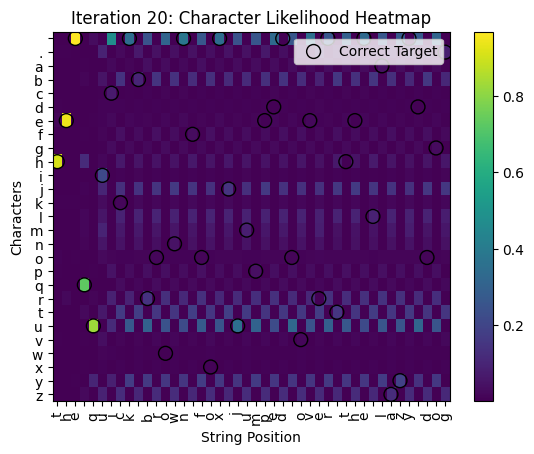

Iteration 25 (loss: 145.3849) Output: \n----\nhe quic.hnarombv.mp dedldfdeumu dmdvaodfwn n\n----
Iteration 30 (loss: 145.1324) Output: \n----\nhe quicvhrhzyr ldnomht oho zarcrgfgtdrfrdkpo\n----
Iteration 35 (loss: 144.8570) Output: \n----\nhe qmi td..eczdbatgjgb qeupfpuwzykkbyt tiip \n----
Iteration 40 (loss: 144.5185) Output: \n----\nhe zuict f lwjuzhm zhl f bpbgoel oee fym l b\n----


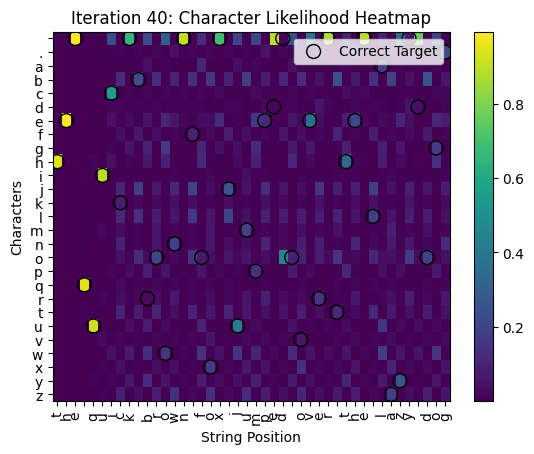

Iteration 45 (loss: 144.0696) Output: \n----\nhe quick zdz our ouiy dfh. oo. mdjd ume dope\n----
Iteration 50 (loss: 143.5792) Output: \n----\nhe quick mr.he jozhr x bdn jumce ogmdn jote \n----
Iteration 55 (loss: 143.0252) Output: \n----\nhe qukck lazyedkd dogk fovcrdzy dohedoge odb\n----
Iteration 60 (loss: 142.3973) Output: \n----\nhe quick fox juxyjdbox fox lazr dtoxc  tyn l\n----


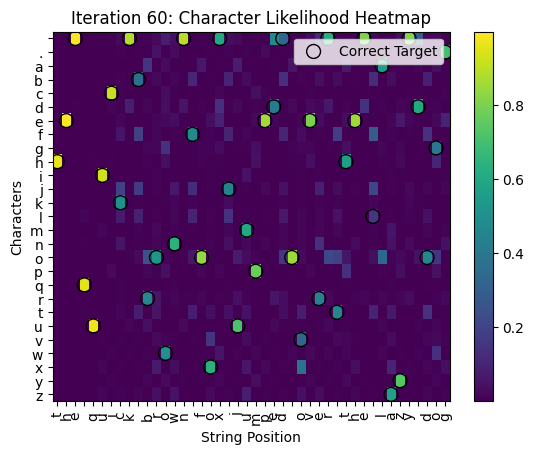

Iteration 65 (loss: 141.7604) Output: \n----\nhe quick luzpeumgveroley lumped overdohe laz\n----
Iteration 70 (loss: 141.0968) Output: \n----\nhe quick brewn fox jan jamzed over the lazy \n----
Iteration 75 (loss: 140.4273) Output: \n----\nhe quick brown fover ohe fox jatobufox bazd.\n----
Iteration 80 (loss: 139.7549) Output: \n----\nhe quick brown ohed overdoazy downdfox jumpe\n----


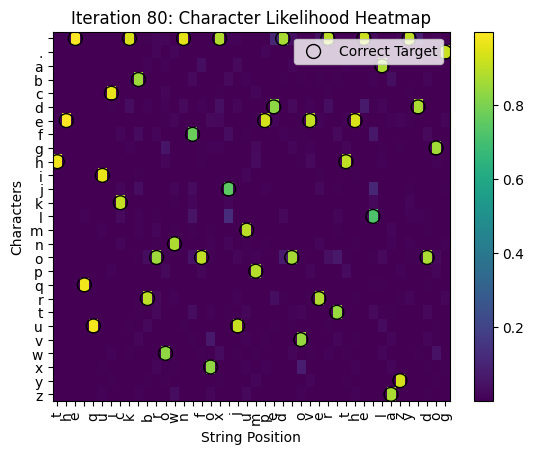

Iteration 85 (loss: 139.0815) Output: \n----\nhe quick brown fox jumped ovee ohe lazwjdog.\n----
Iteration 90 (loss: 138.4080) Output: \n----\nhe quick jrowzy over thed foej tgee abrtwn f\n----
Iteration 95 (loss: 137.7352) Output: \n----\nhe quiwk brpatd oxp. owe fox jumped over the\n----
Iteration 100 (loss: 137.0636) Output: \n----\nhe quick vox jumpc lox jumped over the lazy \n----


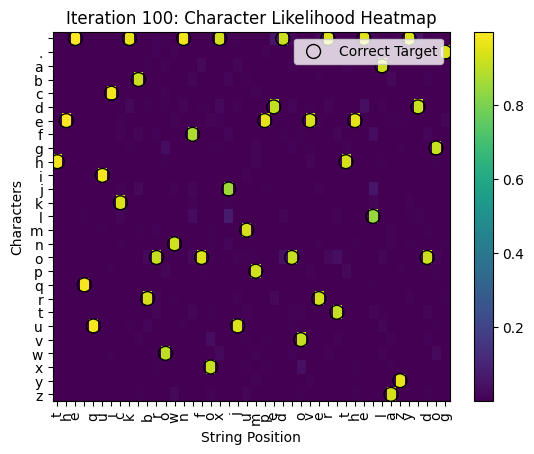

Iteration 105 (loss: 136.3938) Output: \n----\nhe quick brown fox wumped over the laty dtor\n----
Iteration 110 (loss: 135.7259) Output: \n----\nhe quick brown fox jumped  vue lazy dog.clo.\n----
Iteration 115 (loss: 135.0601) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 120 (loss: 134.3967) Output: \n----\nhe quick brown kox jumpe voher the lwzy dog.\n----


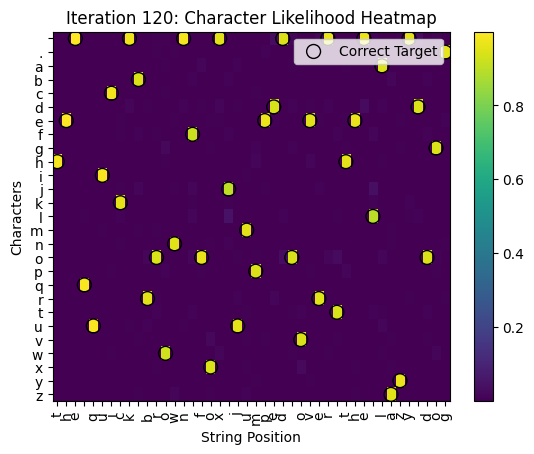

Iteration 125 (loss: 133.7358) Output: \n----\nhe quick brown fox jumped gvck fox jumped ov\n----
Iteration 130 (loss: 133.0775) Output: \n----\nhe quick brown fpx jumped over the lazy. oui\n----
Iteration 135 (loss: 132.4218) Output: \n----\nhe quick broen fox jumped over the lazy  fhe\n----
Iteration 140 (loss: 131.7688) Output: \n----\nhe quick brown fox jdxo.d over the lazy dog.\n----


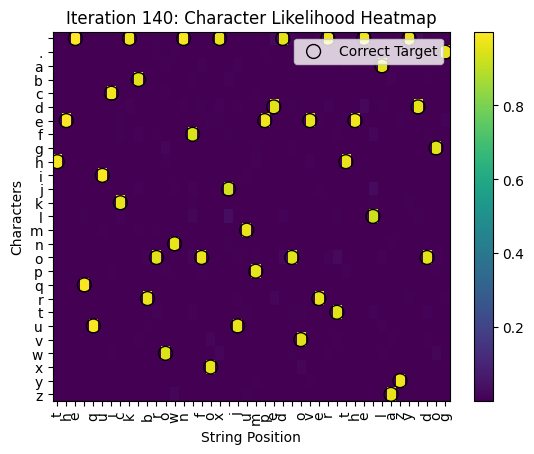

Iteration 145 (loss: 131.1187) Output: \n----\nhe quick brown  ox juzhed over the lazy dog.\n----
Iteration 150 (loss: 130.4714) Output: \n----\nhe quick brown fox jumped over the loveroth.\n----
Iteration 155 (loss: 129.8269) Output: \n----\nhe quicv brown fox jumped over the lazy dog.\n----
Iteration 160 (loss: 129.1853) Output: \n----\nhe quick brown fox jumped oter the lazy dog.\n----


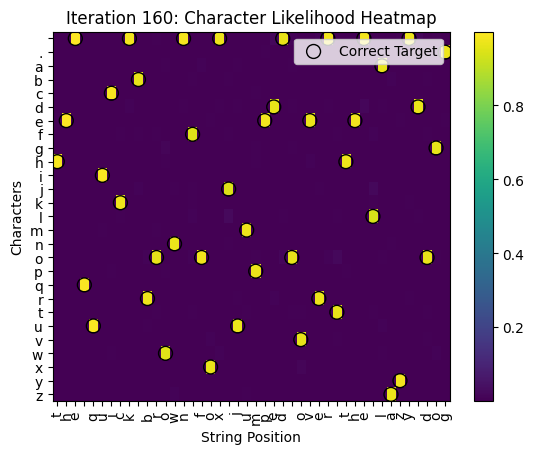

Iteration 165 (loss: 128.5466) Output: \n----\nhe quice brown fox jumped over the lazy dog.\n----
Iteration 170 (loss: 127.9107) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 175 (loss: 127.2779) Output: \n----\nhe quick br.wn fox jumped over the lazy dog.\n----
Iteration 180 (loss: 126.6479) Output: \n----\nhe quick brown fox jumped over the lamp dog.\n----


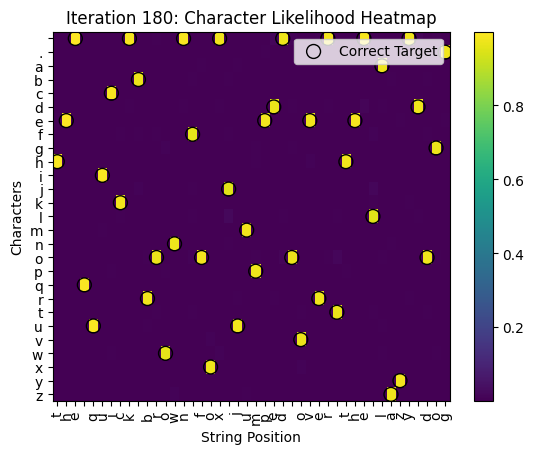

Iteration 185 (loss: 126.0209) Output: \n----\nde quick brown fox jumped over ohe lazy dog.\n----
Iteration 190 (loss: 125.3968) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 195 (loss: 124.7756) Output: \n----\nhe quick brown fax jumped over the  hzy dog.\n----
Iteration 200 (loss: 124.1574) Output: \n----\nhe quick brown fox jumped ovh  the lazy dog.\n----


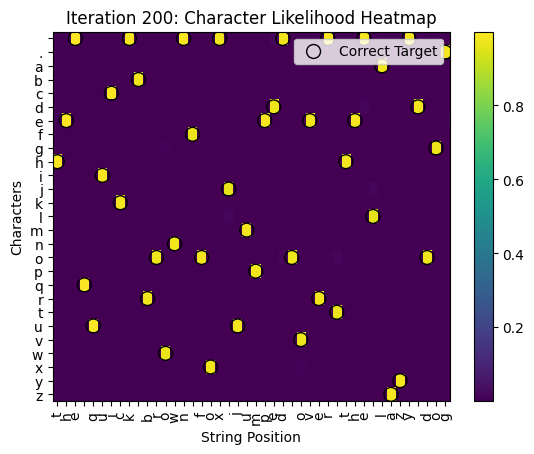

Iteration 205 (loss: 123.5420) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 210 (loss: 122.9297) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 215 (loss: 122.3202) Output: \n----\nhe quick brown fox lazy dog.d over the jumpe\n----
Iteration 220 (loss: 121.7136) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----


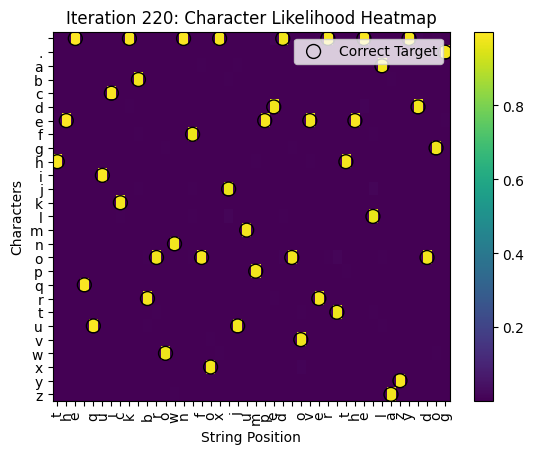

Iteration 225 (loss: 121.1100) Output: \n----\nhe qaick brown fox jumped over the lazy dog.\n----
Iteration 230 (loss: 120.5092) Output: \n----\nhe quick brown fox jumged over the lazy dog.\n----
Iteration 235 (loss: 119.9113) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 240 (loss: 119.3164) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----


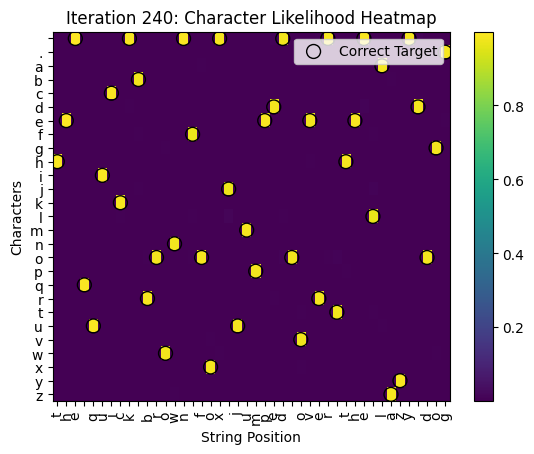

Iteration 245 (loss: 118.7242) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 250 (loss: 118.1350) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 255 (loss: 117.5486) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 260 (loss: 116.9650) Output: \n----\nhe quick brown fox jumped over the lazy dobi\n----


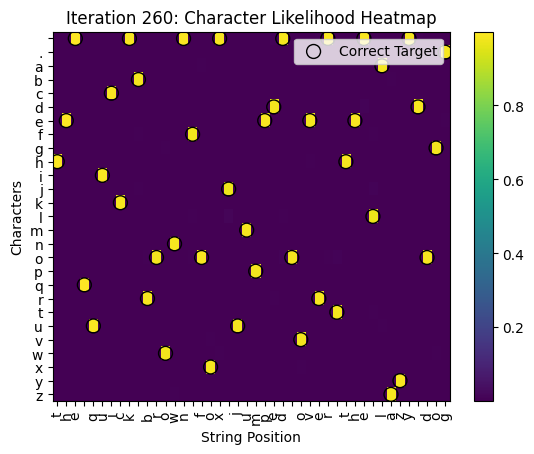

Iteration 265 (loss: 116.3843) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 270 (loss: 115.8064) Output: \n----\nhe xuick brown fox jumped over the lazyk the\n----
Iteration 275 (loss: 115.2314) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 280 (loss: 114.6591) Output: \n----\nhe quick brown fox jumeed over theolazy dog.\n----


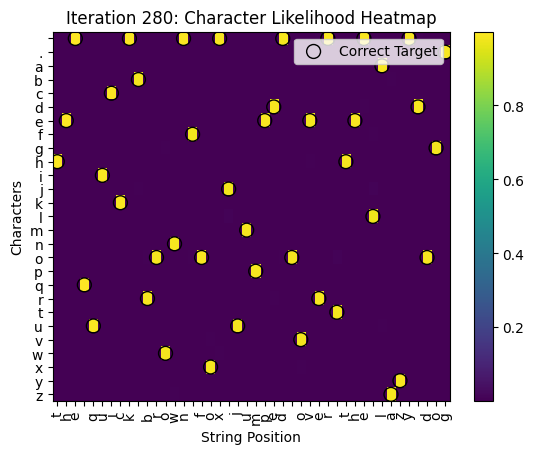

Iteration 285 (loss: 114.0896) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 290 (loss: 113.5229) Output: \n----\nhe quick brown fox jumped over the lazw dog.\n----
Iteration 295 (loss: 112.9590) Output: \n----\nhe quick brown fox jumhed over the lazy dog.\n----
Iteration 300 (loss: 112.3978) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----


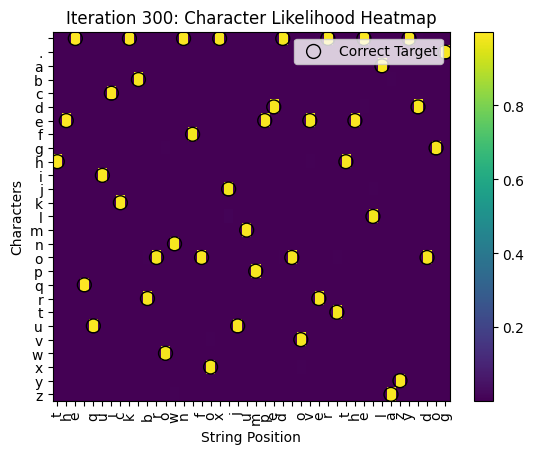

Iteration 305 (loss: 111.8394) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 310 (loss: 111.2837) Output: \n----\nhe quick brown fox jrfo d over the lazy dog.\n----
Iteration 315 (loss: 110.7307) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 320 (loss: 110.1804) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----


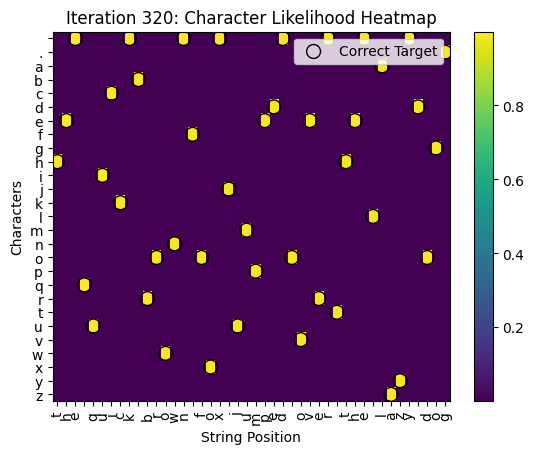

Iteration 325 (loss: 109.6329) Output: \n----\nhe quick brown fox jumced over the lazy dog.\n----
Iteration 330 (loss: 109.0880) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 335 (loss: 108.5458) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 340 (loss: 108.0063) Output: \n----\nhe quick brown fox jumped over the lax jdmpe\n----


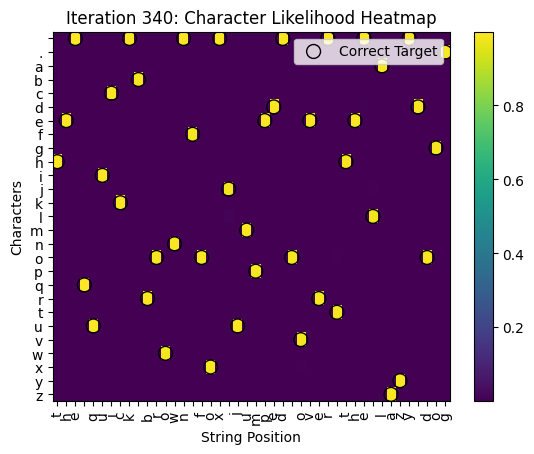

Iteration 345 (loss: 107.4694) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 350 (loss: 106.9352) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 355 (loss: 106.4035) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 360 (loss: 105.8746) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----


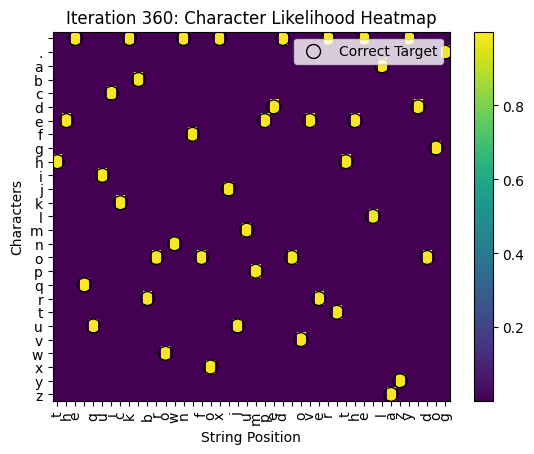

Iteration 365 (loss: 105.3482) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 370 (loss: 104.8244) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 375 (loss: 104.3032) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 380 (loss: 103.7845) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----


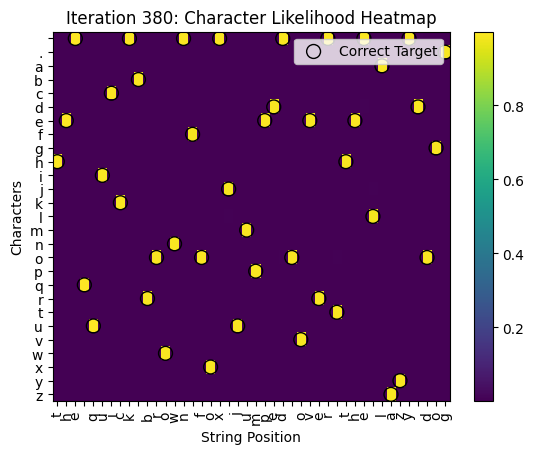

Iteration 385 (loss: 103.2684) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 390 (loss: 102.7549) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 395 (loss: 102.2439) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 400 (loss: 101.7354) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----


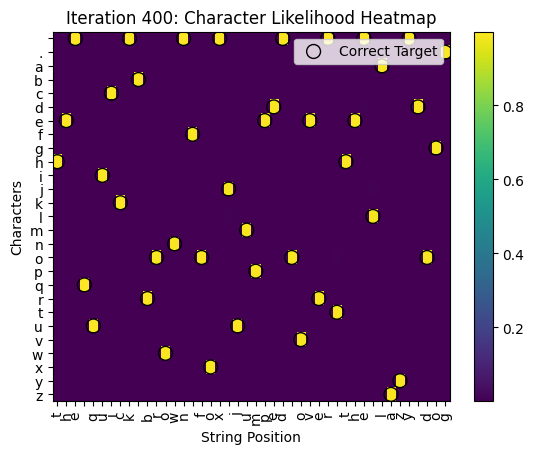

Iteration 405 (loss: 101.2294) Output: \n----\nhe quick brown fox jumped over thn lhby dog.\n----
Iteration 410 (loss: 100.7260) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 415 (loss: 100.2250) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 420 (loss: 99.7264) Output: \n----\nhe quick brown fox jumped tver the lazy dog.\n----


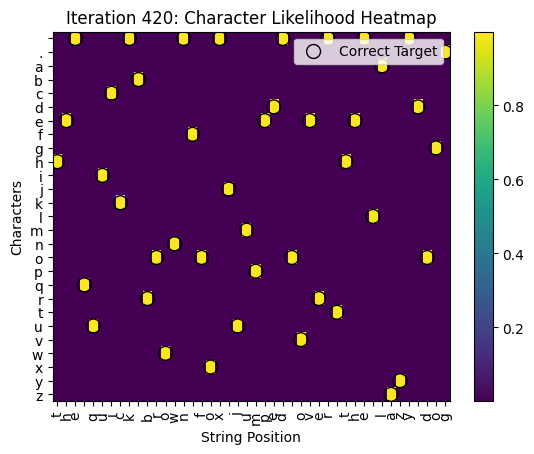

Iteration 425 (loss: 99.2304) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 430 (loss: 98.7368) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 435 (loss: 98.2456) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 440 (loss: 97.7569) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----


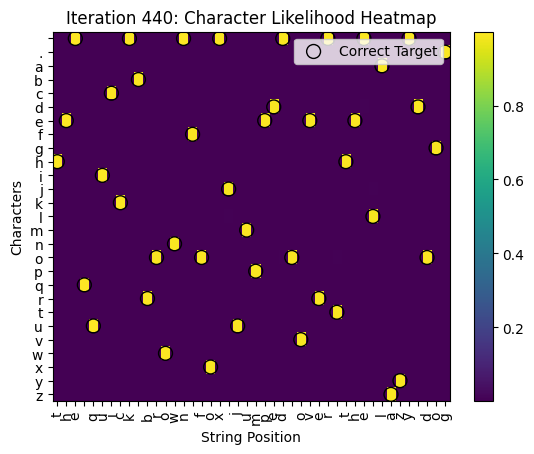

Iteration 445 (loss: 97.2706) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 450 (loss: 96.7867) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 455 (loss: 96.3052) Output: \n----\nhe quick brown fox jumped over the lazy doi.\n----
Iteration 460 (loss: 95.8260) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----


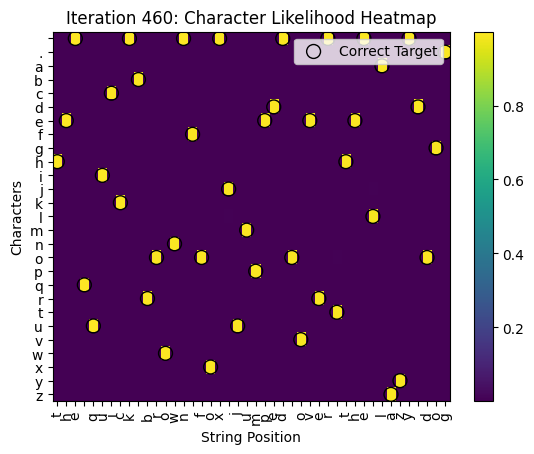

Iteration 465 (loss: 95.3493) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 470 (loss: 94.8749) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 475 (loss: 94.4028) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 480 (loss: 93.9331) Output: \n----\nhe quick brown fox jumped over the lazy tng.\n----


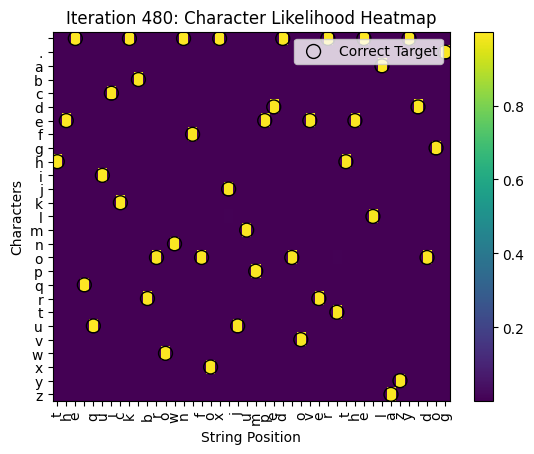

Iteration 485 (loss: 93.4657) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 490 (loss: 93.0007) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----
Iteration 495 (loss: 92.5379) Output: \n----\nhe quick brown fox jumped over the lazy dog.\n----


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

"""
Minimal character-level Vanilla RNN model. Modified for conditioned probability distribution visualization.
Written by Andrej Karpathy (@karpathy), modified for visualization by OpenAI community.
BSD License
"""

def lossFun(inputs, targets, hprev):
    """
    inputs,targets are both list of integers.
    hprev is Hx1 array of initial hidden state
    returns the loss, gradients on model parameters, last hidden state, and probability distributions
    """
    xs, hs, ys, ps = {}, {}, {}, {}
    hs[-1] = np.copy(hprev)
    loss = 0
    # forward pass
    for t in range(len(inputs)):
        xs[t] = np.zeros((vocab_size, 1))  # encode in 1-of-k representation
        xs[t][inputs[t]] = 1
        hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t - 1]) + bh)  # hidden state
        ys[t] = np.dot(Why, hs[t]) + by  # unnormalized log probabilities for next chars
        ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t]))  # probabilities for next chars

        loss += -np.log(ps[t][targets[t], 0])  # softmax (cross-entropy loss)

    # backward pass: compute gradients going backwards
    dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
    dbh, dby = np.zeros_like(bh), np.zeros_like(by)
    dhnext = np.zeros_like(hs[0])
    for t in reversed(range(len(inputs))):
        dy = np.copy(ps[t])
        dy[targets[t]] -= 1  # backprop into y
        dWhy += np.dot(dy, hs[t].T)
        dby += dy
        dh = np.dot(Why.T, dy) + dhnext  # backprop into h
        dhraw = (1 - hs[t] * hs[t]) * dh  # backprop through tanh nonlinearity
        dbh += dhraw
        dWxh += np.dot(dhraw, xs[t].T)
        dWhh += np.dot(dhraw, hs[t - 1].T)
        dhnext = np.dot(Whh.T, dhraw)
    for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
        np.clip(dparam, -5, 5, out=dparam)  # clip to mitigate exploding gradients
    return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs) - 1], ps

def sample(h, seed_ix, n):
    """
    sample a sequence of integers from the model
    h is memory state, seed_ix is seed letter for first time step
    """
    x = np.zeros((vocab_size, 1))
    x[seed_ix] = 1
    ixes = []

    for t in range(n):
        h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
        y = np.dot(Why, h) + by
        p = np.exp(y) / np.sum(np.exp(y))
        ix = np.random.choice(range(vocab_size), p=p.ravel())
        x = np.zeros((vocab_size, 1))
        x[ix] = 1
        ixes.append(ix)
    return ixes

# Data setup
data = 'the quick brown fox jumped over the lazy dog.'
chars = sorted(list(set(data)))
data_size, vocab_size = len(data), len(chars)
char_to_ix = {ch: i for i, ch in enumerate(chars)}
ix_to_char = {i: ch for i, ch in enumerate(chars)}

# Hyperparameters
hidden_size = 100  # size of hidden layer of neurons
sample_length = data_size - 1
seq_length = sample_length  # number of steps to unroll the RNN for
learning_rate = 1e-1

# Model parameters
Wxh = np.random.randn(hidden_size, vocab_size) * 0.01  # input to hidden
Whh = np.random.randn(hidden_size, hidden_size) * 0.01  # hidden to hidden
Why = np.random.randn(vocab_size, hidden_size) * 0.01  # hidden to output
bh = np.zeros((hidden_size, 1))  # hidden bias
by = np.zeros((vocab_size, 1))  # output bias

# Training setup
n, p = 0, 0
mWxh, mWhh, mWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
mbh, mby = np.zeros_like(bh), np.zeros_like(by)  # memory variables for Adagrad
smooth_loss = -np.log(1.0 / vocab_size) * seq_length  # loss at iteration 0

max_iters = 500
while n < max_iters:
    # Prepare inputs
    if p + seq_length + 1 >= len(data) or n == 0:
        hprev = np.zeros((hidden_size, 1))  # reset RNN memory
        p = 0  # go from start of data
    inputs = [char_to_ix[ch] for ch in data[p:p + seq_length]]
    targets = [char_to_ix[ch] for ch in data[p + 1:p + seq_length + 1]]

    if n % 5 == 0:
        sample_ix = sample(hprev, inputs[0], sample_length)
        txt = ''.join(ix_to_char[ix] for ix in sample_ix)
        print(f'Iteration {n} (loss: {smooth_loss:.4f}) Output: \\n----\\n{txt}\\n----')

    # Forward and backward pass
    loss, dWxh, dWhh, dWhy, dbh, dby, hprev, ps = lossFun(inputs, targets, hprev)
    smooth_loss = smooth_loss * 0.999 + loss * 0.001

    # Generate heatmap and scatterplot every 20 iterations
    if n % 20 == 0:
        heat_data = []
        target_positions = []

        for t in range(len(inputs)):
            heat_data.append(ps[t].squeeze())
            target_positions.append((t, targets[t]))

        heat_data = np.array(heat_data).T

        # Plot heatmap
        plt.imshow(heat_data, aspect='auto', cmap='viridis')
        plt.colorbar()

        # Overlay scatter plot
        scatter_x, scatter_y = zip(*target_positions)
        plt.scatter(scatter_x, scatter_y, color='red', edgecolor='black', facecolors='none', s=100, label='Correct Target')

        plt.xlabel('String Position')
        plt.xticks(range(len(inputs)), [ix_to_char[ix] for ix in inputs], rotation=90)
        plt.ylabel('Characters')
        plt.yticks(range(len(chars)), chars)
        plt.title(f'Iteration {n}: Character Likelihood Heatmap')
        plt.legend()
        plt.show()

    # Update model parameters
    for param, dparam, mem in zip([Wxh, Whh, Why, bh, by],
                                   [dWxh, dWhh, dWhy, dbh, dby],
                                   [mWxh, mWhh, mWhy, mbh, mby]):
        mem += dparam * dparam
        param += -learning_rate * dparam / np.sqrt(mem + 1e-8)  # Adagrad update

    p += seq_length  # Move data pointer
    n += 1  # Iteration counter

### EXERCISE3-TASK2: [10 marks]

The Mackey-Glass dataset is a well-known chaotic time series commonly used in time series prediction research. It is included in the folder for this assignment, and depicted in the output of the cell block below.

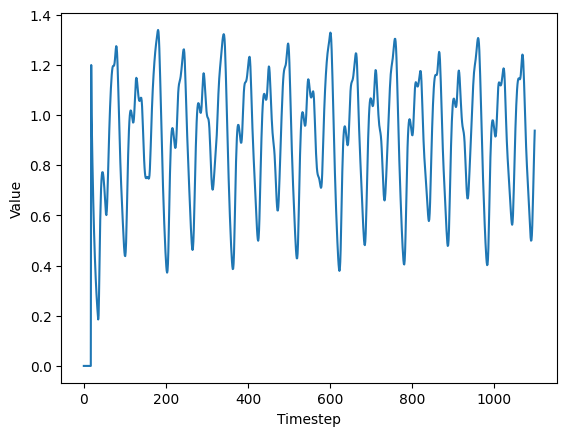

In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/kpc-simone/cs480-f24/refs/heads/main/assignments/a4/mackey_glass.csv'
mgdf = pd.read_csv(url)

fig,ax = plt.subplots(1,1)
ax.plot(mgdf.index, mgdf['t'])
ax.set_xlabel('Timestep')
ax.set_ylabel('Value')
plt.show()

**Objective:** Build an LSTM model using the PyTorch library and apply it to the Mackey-Glass dataset.

**Detailed Instructions:** Implement an LSTM model using PyTorch’s `nn.Module` class and structure the training process with optimization and evaluation metrics. They should start by importing necessary libraries, including `torch`, `torch.optim`, and `torch.utils.data`, to structure the training loop and evaluation framework.

Being by splitting the dataset into training (40%), validation (40%), and test (20%) sets. Then, generate input-output pairs with a lookback window of 1, which slides over the series to predict the next step. Next, define an LSTM model class in PyTorch with one LSTM layer and a linear layer for predicting single values from hidden states. Use Mean Squared Error (MSE) loss, and use the Adam optimizer. Train the model for 2000 epochs, and evaluate and record the (RMSE) on both training and validation set every 100 epochs. After training is complete, plot curves of both the training error and validation error.

<ipython-input-12-9b685a81f517>:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  X_train, y_train = torch.Tensor(X_train), torch.Tensor(y_train)


Epoch [0/2000], Train RMSE: 1.3201568202172353, Val RMSE: 1.3757105205319122
Epoch [100/2000], Train RMSE: 0.40351087567131705, Val RMSE: 0.41429944983095585
Epoch [200/2000], Train RMSE: 0.2295246252075663, Val RMSE: 0.20947203761519761
Epoch [300/2000], Train RMSE: 0.11506830301129746, Val RMSE: 0.09709863660670424
Epoch [400/2000], Train RMSE: 0.09478640877984604, Val RMSE: 0.06986423040563608
Epoch [500/2000], Train RMSE: 0.08380636450370038, Val RMSE: 0.05733736024045949
Epoch [600/2000], Train RMSE: 0.07711090460548148, Val RMSE: 0.04934458874946507
Epoch [700/2000], Train RMSE: 0.07629270639776028, Val RMSE: 0.04411931896638679
Epoch [800/2000], Train RMSE: 0.07063885102946708, Val RMSE: 0.04087788010998416
Epoch [900/2000], Train RMSE: 0.06911779056254504, Val RMSE: 0.038688425070414624
Epoch [1000/2000], Train RMSE: 0.07185286220690673, Val RMSE: 0.03739773891101542
Epoch [1100/2000], Train RMSE: 0.07149038388672789, Val RMSE: 0.036732528964213564
Epoch [1200/2000], Train RMSE

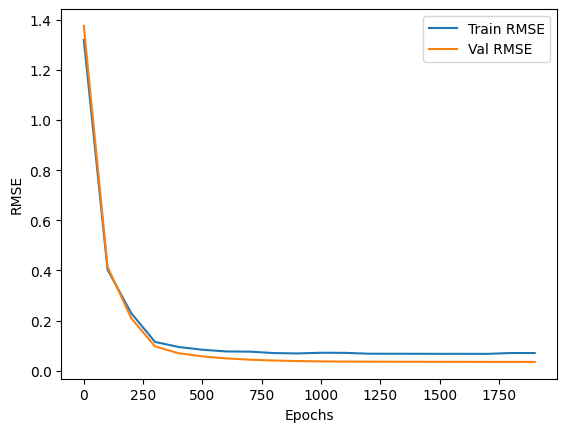

Test RMSE: 0.0357


In [ ]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Importing the dataset
url = 'https://raw.githubusercontent.com/kpc-simone/cs480-f24/refs/heads/main/assignments/a4/mackey_glass.csv'
df = pd.read_csv(url)

# Extract the 't' column values
val = df['t'].values

# Define the lookback window (number of previous steps to consider as input)
lookback = 1

# Prepare the input (X) and target (y) sequences
X, y = [], []
for i in range(len(val) - lookback):
    X.append(val[i:i + lookback])  # Append the lookback window values
    y.append(val[i + lookback])   # Append the corresponding target value

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, shuffle=False)

# Convert the datasets into PyTorch tensors
X_train, y_train = torch.Tensor(X_train), torch.Tensor(y_train)
X_val, y_val = torch.Tensor(X_val), torch.Tensor(y_val)
X_test, y_test = torch.Tensor(X_test), torch.Tensor(y_test)

# Define an LSTM model class
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)  # LSTM layer
        self.fc = nn.Linear(hidden_size, output_size)  # Fully connected layer for final output

    def forward(self, x):
        out, _ = self.lstm(x)  # Pass input through the LSTM
        out = self.fc(out[:, -1, :])  # Use the last time step's hidden state as input to the FC layer
        return out

# Initialize the model, MSE loss function, and the Adam optimizer
model = LSTMModel(input_size=1, hidden_size=1, output_size=1)
criterion = nn.MSELoss()  # Mean Squared Error Loss for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Prepare PyTorch Dataset
train_data = data.TensorDataset(X_train.unsqueeze(-1), y_train)
val_data = data.TensorDataset(X_val.unsqueeze(-1), y_val)

# Define data loaders
batch_size = 64
train_loader = data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = data.DataLoader(val_data, batch_size=batch_size)

# Variables to store RMSE values for visualization
train_rmse = []
val_rmse = []

# Number of training epochs
num_epochs = 2000

# Training loop
for epoch in range(num_epochs):
    # Set model to training mode
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  # Reset gradients
        outputs = model(X_batch)  # Forward pass
        loss = criterion(outputs, y_batch.unsqueeze(-1))  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update weights
        train_loss += loss.item()

    # Set model to evaluation mode for validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)  # Forward pass
            loss = criterion(outputs, y_batch.unsqueeze(-1))  # Compute validation loss
            val_loss += loss.item()

    # Record RMSE every 100 epochs
    if epoch % 100 == 0:
        train_rmse.append(np.sqrt(train_loss / len(train_loader)))  # Compute RMSE for training
        val_rmse.append(np.sqrt(val_loss / len(val_loader)))  # Compute RMSE for validation
        print(f"Epoch [{epoch}/{num_epochs}], Train RMSE: {train_rmse[-1]}, Val RMSE: {val_rmse[-1]}")

# Plot training and validation RMSE over epochs
epoch_range = np.arange(0, num_epochs, 100)
plt.plot(epoch_range, train_rmse, label="Train RMSE")
plt.plot(epoch_range, val_rmse, label="Val RMSE")
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()
plt.show()

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test.unsqueeze(-1))  # Predict on test set
    test_loss = criterion(test_outputs, y_test.unsqueeze(-1))  # Compute test loss
    test_rmse = np.sqrt(test_loss.item())  # Compute RMSE for test set
    print(f"Test RMSE: {test_rmse:.4f}")

## Exercise 4: Attention

### EXERCISE5-TASK1: [10 Marks]
Select and visualize a fixed attention mechanism applied to augment a time series prediction model for the Mackey-Glass dataset.

**Detailed Instructions:** The objective is to examine the role of a fixed attention mechanism in a time series context by visualizing the effect of fixed attention weights on different data windows from the Mackey-Glass dataset.
Choose a kernel function (e.g., Gaussian, Laplace) to assign similarity-based attention weights to each timestep in a window based on its distance from the query value.

Starting at timestep 42 in the Mackey-Glass dataset, create a series of 100 data windows, each with a length of 50 timesteps. Construct each subsequent window by moving forward 5 timesteps from the previous window’s starting point. This will create staggered, partially overlapping windows.
Use the last timestep in each window as the query value and apply your kernel function to calculate similarity-based attention weights for each timestep in the window.

Visualize the results as a heatmap, where each row represents a different data window and each column represents a timestep in the lookback window (from -49 to 0, with 0 being the most recent timestep). Include a colorbar and labels for the x- and y-axes.

Write a few sentences to interpret the colors in the heatmap in relation to the similarity of each timestep to the query value. Higher intensity (brighter) colors should correspond to timesteps that are more similar (or more relevant, according to the fixed kernel) to the query. Describe any patterns you observe in the heatmap. Consider whether certain intervals in the past are consistently weighted more heavily and if there are any repeated structures in the weighting patterns.
Finally, reflect on the limitations of this fixed attention mechanism. Consider how it differs from adaptive attention mechanisms covered in class, which dynamically adjust attention weights based on the content of each window. What might be lost by using a fixed attention approach in terms of capturing temporal dependencies in the data?

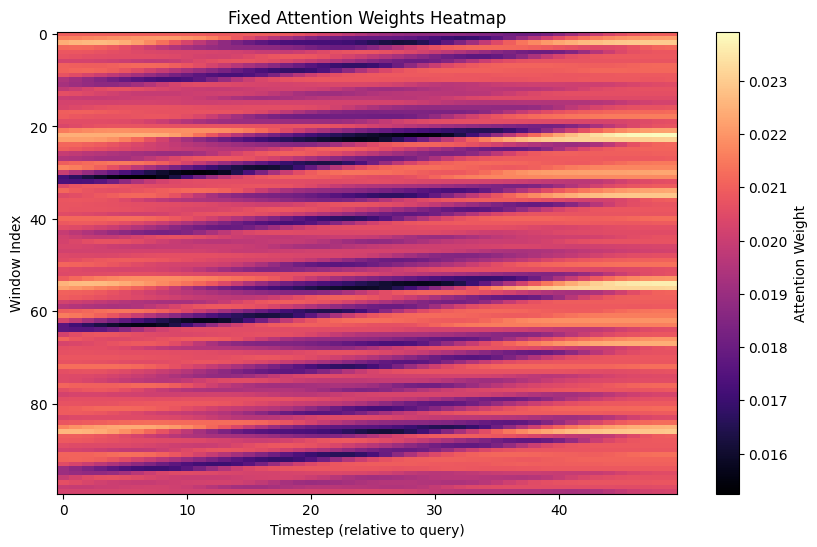

In [ ]:
# Load the Mackey-Glass time series dataset
df = pd.read_csv('https://raw.githubusercontent.com/kpc-simone/cs480-f24/refs/heads/main/assignments/a4/mackey_glass.csv')
value = df['t'].values  # Extract the 't' column values as a NumPy array

# Prepare sliding data windows
data_windows = []  # List to store each window of data

# Generate overlapping data windows of size 50, with a step size of 5
for i in range(42, 42 + 500, 5):
    window = value[i: i + 50]  # Extract a window of 50 timesteps
    data_windows.append(window)

data_windows = np.array(data_windows)  # Convert list of windows to a NumPy array

# Define a Gaussian kernel function for fixed attention mechanism
def gaussian_kernel(query, timesteps, sigma=1.0):
    """
    Compute Gaussian weights for each timestep in the window.

    Input:
    query: The reference value (last timestep in the window).
    timesteps: The array of timesteps within the window.
    sigma: Standard deviation of the Gaussian distribution.
    """
    dist = np.abs(timesteps - query)  # Compute distance from query
    wt = np.exp(- dist ** 2 / (2 * sigma**2))  # Compute Gaussian weights
    return wt / wt.sum()  # Normalize weights to sum to 1

# Compute attention weights for each data window
attention_wt = []
for i in data_windows:
    query = i[-1]  # The query is the last value in the window
    wt = gaussian_kernel(query, i)  # Compute Gaussian weights for the window
    attention_wt.append(wt)  # Append the attention weights for the current window

# Convert attention weights to a NumPy array
attention_wt = np.array(attention_wt)

# Creating a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(attention_wt, aspect="auto", cmap="magma")  # Display the heatmap
plt.colorbar(label="Attention Weight")  # Adding a colorbar
plt.xlabel("Timestep (relative to query)")  # Label for x-axis
plt.ylabel("Window Index")  # Label for y-axis
plt.title("Fixed Attention Weights Heatmap")  # Title
plt.show()

The heatmap's brighter colors indicate timesteps that have higher similarity to the query value based on the kernel function. Darker colors represent lower similarity. The repetitive stripes in the data show that there are consistent patterns throughout, reflecting the regular nature of the dataset. The main challenge is that we are using a fixed attention mechanism, which might miss important patterns that appear outside the end of the window. However, because the dataset is fairly regular, our attention mechanism is still able to capture the relationships between nearby data points effectively.